In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_airbnb = pd.read_csv("C:/Users/carlo/Downloads/airbnb-listings.csv", sep = ";")

## División de TRAIN y TEST

In [3]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("C:/Users/carlo/Downloads/airbnb-listings.csv", sep = ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('C:/Users/carlo/Downloads/airbnb-listings-train.csv', sep=';', decimal='.', index=False)
test.to_csv('C:/Users/carlo/Downloads/airbnb-listings-test.csv', sep=';', decimal='.', index=False)

# Trabajamos únicamente con el dataset de train

df_airbnb = pd.read_csv('C:/Users/carlo/Downloads/airbnb-listings-train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## Análisis Exploratorio de los Datos

In [29]:
print(df_airbnb.head())
print(df_airbnb.describe())

   Name  Space  Description  Neighborhood Overview  Notes  Transit  Access  \
0  1675      0         9585                      0      0        0       0   
1  6002   2746         4766                   4513   1243       46      61   
2  1955   6274         2398                   3634      0     3678       0   
3  9368      0         9924                      0      0        0       0   
4  9594   7390        10396                      0      0        0       0   

   House Rules  Host Verifications  Street  ...  Review Scores Accuracy  \
0         3119                 156     727  ...                    10.0   
1          579                  16     427  ...                    10.0   
2            0                 126     909  ...                    10.0   
3            0                   9      49  ...                    10.0   
4         2015                 133    1342  ...                    10.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                       1

In [5]:
# Ver las columnas con los valores nulos para realizar la imputación de valores.
columnas_con_nulos = df_airbnb.columns[df_airbnb.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
['Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host list

In [6]:
# Imputación de Valores 

columnas_numericas = ['Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
                      'Security Deposit', 'Cleaning Fee', 'Review Scores Rating',
                      'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 
                      'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
                      'Calculated host listings count', 'Reviews per Month', 'Host Listings Count', 'Host Total Listings Count', 'Host Response Rate']

for columna in columnas_numericas:
    df_airbnb[columna].fillna(df_airbnb[columna].mode()[0], inplace=True)

    
columnas_objeto = ['Picture Url', 'XL Picture Url', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Neighbourhood',
                    'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Amenities', 'Has Availability', 'First Review',
                    'Last Review', 'License', 'Jurisdiction Names', 'Features', 'Space', 'Name', 'Summary', 'Description', 'Neighborhood Overview', 
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url']


for columna in columnas_objeto:
    df_airbnb[columna] = df_airbnb[columna].fillna('')
    
    
# Verificar que los valores nulos se hayan imputado correctamente
print(df_airbnb.isnull().any())

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                              False
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                 False
Geolocation                       False
Features                          False
Length: 89, dtype: bool


In [7]:
columnas_con_nulos = df_airbnb.columns[df_airbnb.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
[]


In [8]:
#Se han eliminado columnas innecesarias para el modelo, como las de tipo 'id' y 'url'. Además, se han descartado aquellas que redundan en información,
#como 'City', 'Market', 'State', 'Country' y 'Country Code', que contiene datos que están en 'Smart Location'. Asimismo, se han excluido
#las relacionadas con la información del anfitrión, consideradas irrelevantes para el modelo de predicción de precios.

df_airbnb = df_airbnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                            'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                           'Calendar last Scraped', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                           'Host Acceptance Rate', 'Calendar Updated', 'Host Neighbourhood', 'City', 'Market', 'State', 'Country', 'Country Code',
                            'Interaction', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
                            'Calculated host listings count'], axis=1)

In [9]:
# Celda para saber las variables que hay que codificar
columnas = df_airbnb.select_dtypes(include=['object']).columns
columnas_num = df_airbnb.select_dtypes(include=['float64', 'int64']).columns
print(columnas)
print(columnas_num)

58
Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'House Rules',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Zipcode',
       'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Has Availability', 'First Review', 'Last Review', 'License',
       'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')
Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 

In [10]:

#CODIFICACIÓN DE VARIABLES CATEGÓRICAS

from sklearn import preprocessing

# Crear una instancia de LabelEncoder para cada variable categórica
le_Name = preprocessing.LabelEncoder()
le_Summary = preprocessing.LabelEncoder()
le_Space = preprocessing.LabelEncoder()
le_Description = preprocessing.LabelEncoder()
le_Experiences_Offered = preprocessing.LabelEncoder()
le_Neighborhood_Overview = preprocessing.LabelEncoder()
le_Notes = preprocessing.LabelEncoder()
le_Transit = preprocessing.LabelEncoder()
le_Access = preprocessing.LabelEncoder()
le_House_Rules = preprocessing.LabelEncoder()
le_Host_Verifications = preprocessing.LabelEncoder()
le_Street = preprocessing.LabelEncoder()
le_Neighbourhood = preprocessing.LabelEncoder()
le_Neighbourhood_Cleansed = preprocessing.LabelEncoder()
le_Neighbourhood_Group_Cleansed = preprocessing.LabelEncoder()
le_Zipcode = preprocessing.LabelEncoder()
le_Smart_Location = preprocessing.LabelEncoder()
le_Property_Type = preprocessing.LabelEncoder()
le_Room_Type = preprocessing.LabelEncoder()
le_Bed_Type = preprocessing.LabelEncoder()
le_Amenities = preprocessing.LabelEncoder()
le_Has_Availability = preprocessing.LabelEncoder()
le_First_Review = preprocessing.LabelEncoder()
le_Last_Review = preprocessing.LabelEncoder()
le_License = preprocessing.LabelEncoder()
le_Jurisdiction_Names = preprocessing.LabelEncoder()
le_Cancellation_Policy = preprocessing.LabelEncoder()
le_Geolocation = preprocessing.LabelEncoder()
le_Features = preprocessing.LabelEncoder()

# Ajustar y transformar cada variable categórica
df_airbnb['Name'] = le_Name.fit_transform(df_airbnb['Name'])
df_airbnb['Summary'] = le_Summary.fit_transform(df_airbnb['Summary'])
df_airbnb['Space'] = le_Space.fit_transform(df_airbnb['Space'])
df_airbnb['Description'] = le_Description.fit_transform(df_airbnb['Description'])
df_airbnb['Experiences Offered'] = le_Experiences_Offered.fit_transform(df_airbnb['Experiences Offered'])
df_airbnb['Neighborhood Overview'] = le_Neighborhood_Overview.fit_transform(df_airbnb['Neighborhood Overview'])
df_airbnb['Notes'] = le_Notes.fit_transform(df_airbnb['Notes'])
df_airbnb['Transit'] = le_Transit.fit_transform(df_airbnb['Transit'])
df_airbnb['Access'] = le_Access.fit_transform(df_airbnb['Access'])
df_airbnb['House Rules'] = le_House_Rules.fit_transform(df_airbnb['House Rules'])
df_airbnb['Host Verifications'] = le_Host_Verifications.fit_transform(df_airbnb['Host Verifications'])
df_airbnb['Street'] = le_Street.fit_transform(df_airbnb['Street'])
df_airbnb['Neighbourhood'] = le_Neighbourhood.fit_transform(df_airbnb['Neighbourhood'])
df_airbnb['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(df_airbnb['Neighbourhood Cleansed'])
df_airbnb['Neighbourhood Group Cleansed'] = le_Neighbourhood_Group_Cleansed.fit_transform(df_airbnb['Neighbourhood Group Cleansed'])
df_airbnb['Zipcode'] = le_Zipcode.fit_transform(df_airbnb['Zipcode'])
df_airbnb['Smart Location'] = le_Smart_Location.fit_transform(df_airbnb['Smart Location'])
df_airbnb['Property Type'] = le_Property_Type.fit_transform(df_airbnb['Property Type'])
df_airbnb['Room Type'] = le_Room_Type.fit_transform(df_airbnb['Room Type'])
df_airbnb['Bed Type'] = le_Bed_Type.fit_transform(df_airbnb['Bed Type'])
df_airbnb['Amenities'] = le_Amenities.fit_transform(df_airbnb['Amenities'])
df_airbnb['Has Availability'] = le_Has_Availability.fit_transform(df_airbnb['Has Availability'])
df_airbnb['First Review'] = le_First_Review.fit_transform(df_airbnb['First Review'])
df_airbnb['Last Review'] = le_Last_Review.fit_transform(df_airbnb['Last Review'])
df_airbnb['License'] = le_License.fit_transform(df_airbnb['License'])
df_airbnb['Jurisdiction Names'] = le_Jurisdiction_Names.fit_transform(df_airbnb['Jurisdiction Names'])
df_airbnb['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(df_airbnb['Cancellation Policy'])
df_airbnb['Geolocation'] = le_Geolocation.fit_transform(df_airbnb['Geolocation'])
df_airbnb['Features'] = le_Features.fit_transform(df_airbnb['Features'])

In [11]:
# Aplicar la transformación a cada valor en las característica seleccionada
df_airbnb['Square Feet'] = df_airbnb['Square Feet'].apply(lambda x: x * 0.092903)

# Renombrar la columna
df_airbnb.rename(columns={'Square Feet': 'Square Meters'}, inplace=True)

# Visualizar los primeros 5 registros
df_airbnb.head(5)

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,House Rules,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Reviews per Month,Geolocation,Features
0,1675,9105,0,9585,2,0,0,0,0,3119,...,10.0,10.0,10.0,10.0,0,0,4,1.00,10589,40
1,6002,4552,2746,4766,2,4513,1243,46,61,579,...,10.0,10.0,10.0,10.0,0,0,4,1.00,4007,11
2,1955,2275,6274,2398,2,3634,0,3678,0,0,...,10.0,10.0,10.0,9.0,0,0,4,2.16,7503,11
3,9368,9358,0,9924,2,0,0,0,0,0,...,10.0,10.0,10.0,10.0,0,0,0,0.18,1744,32
4,9594,9766,7390,10396,2,0,0,0,0,2015,...,10.0,10.0,10.0,10.0,0,0,4,0.09,303,16


## Visualización y Eliminación de Outliers

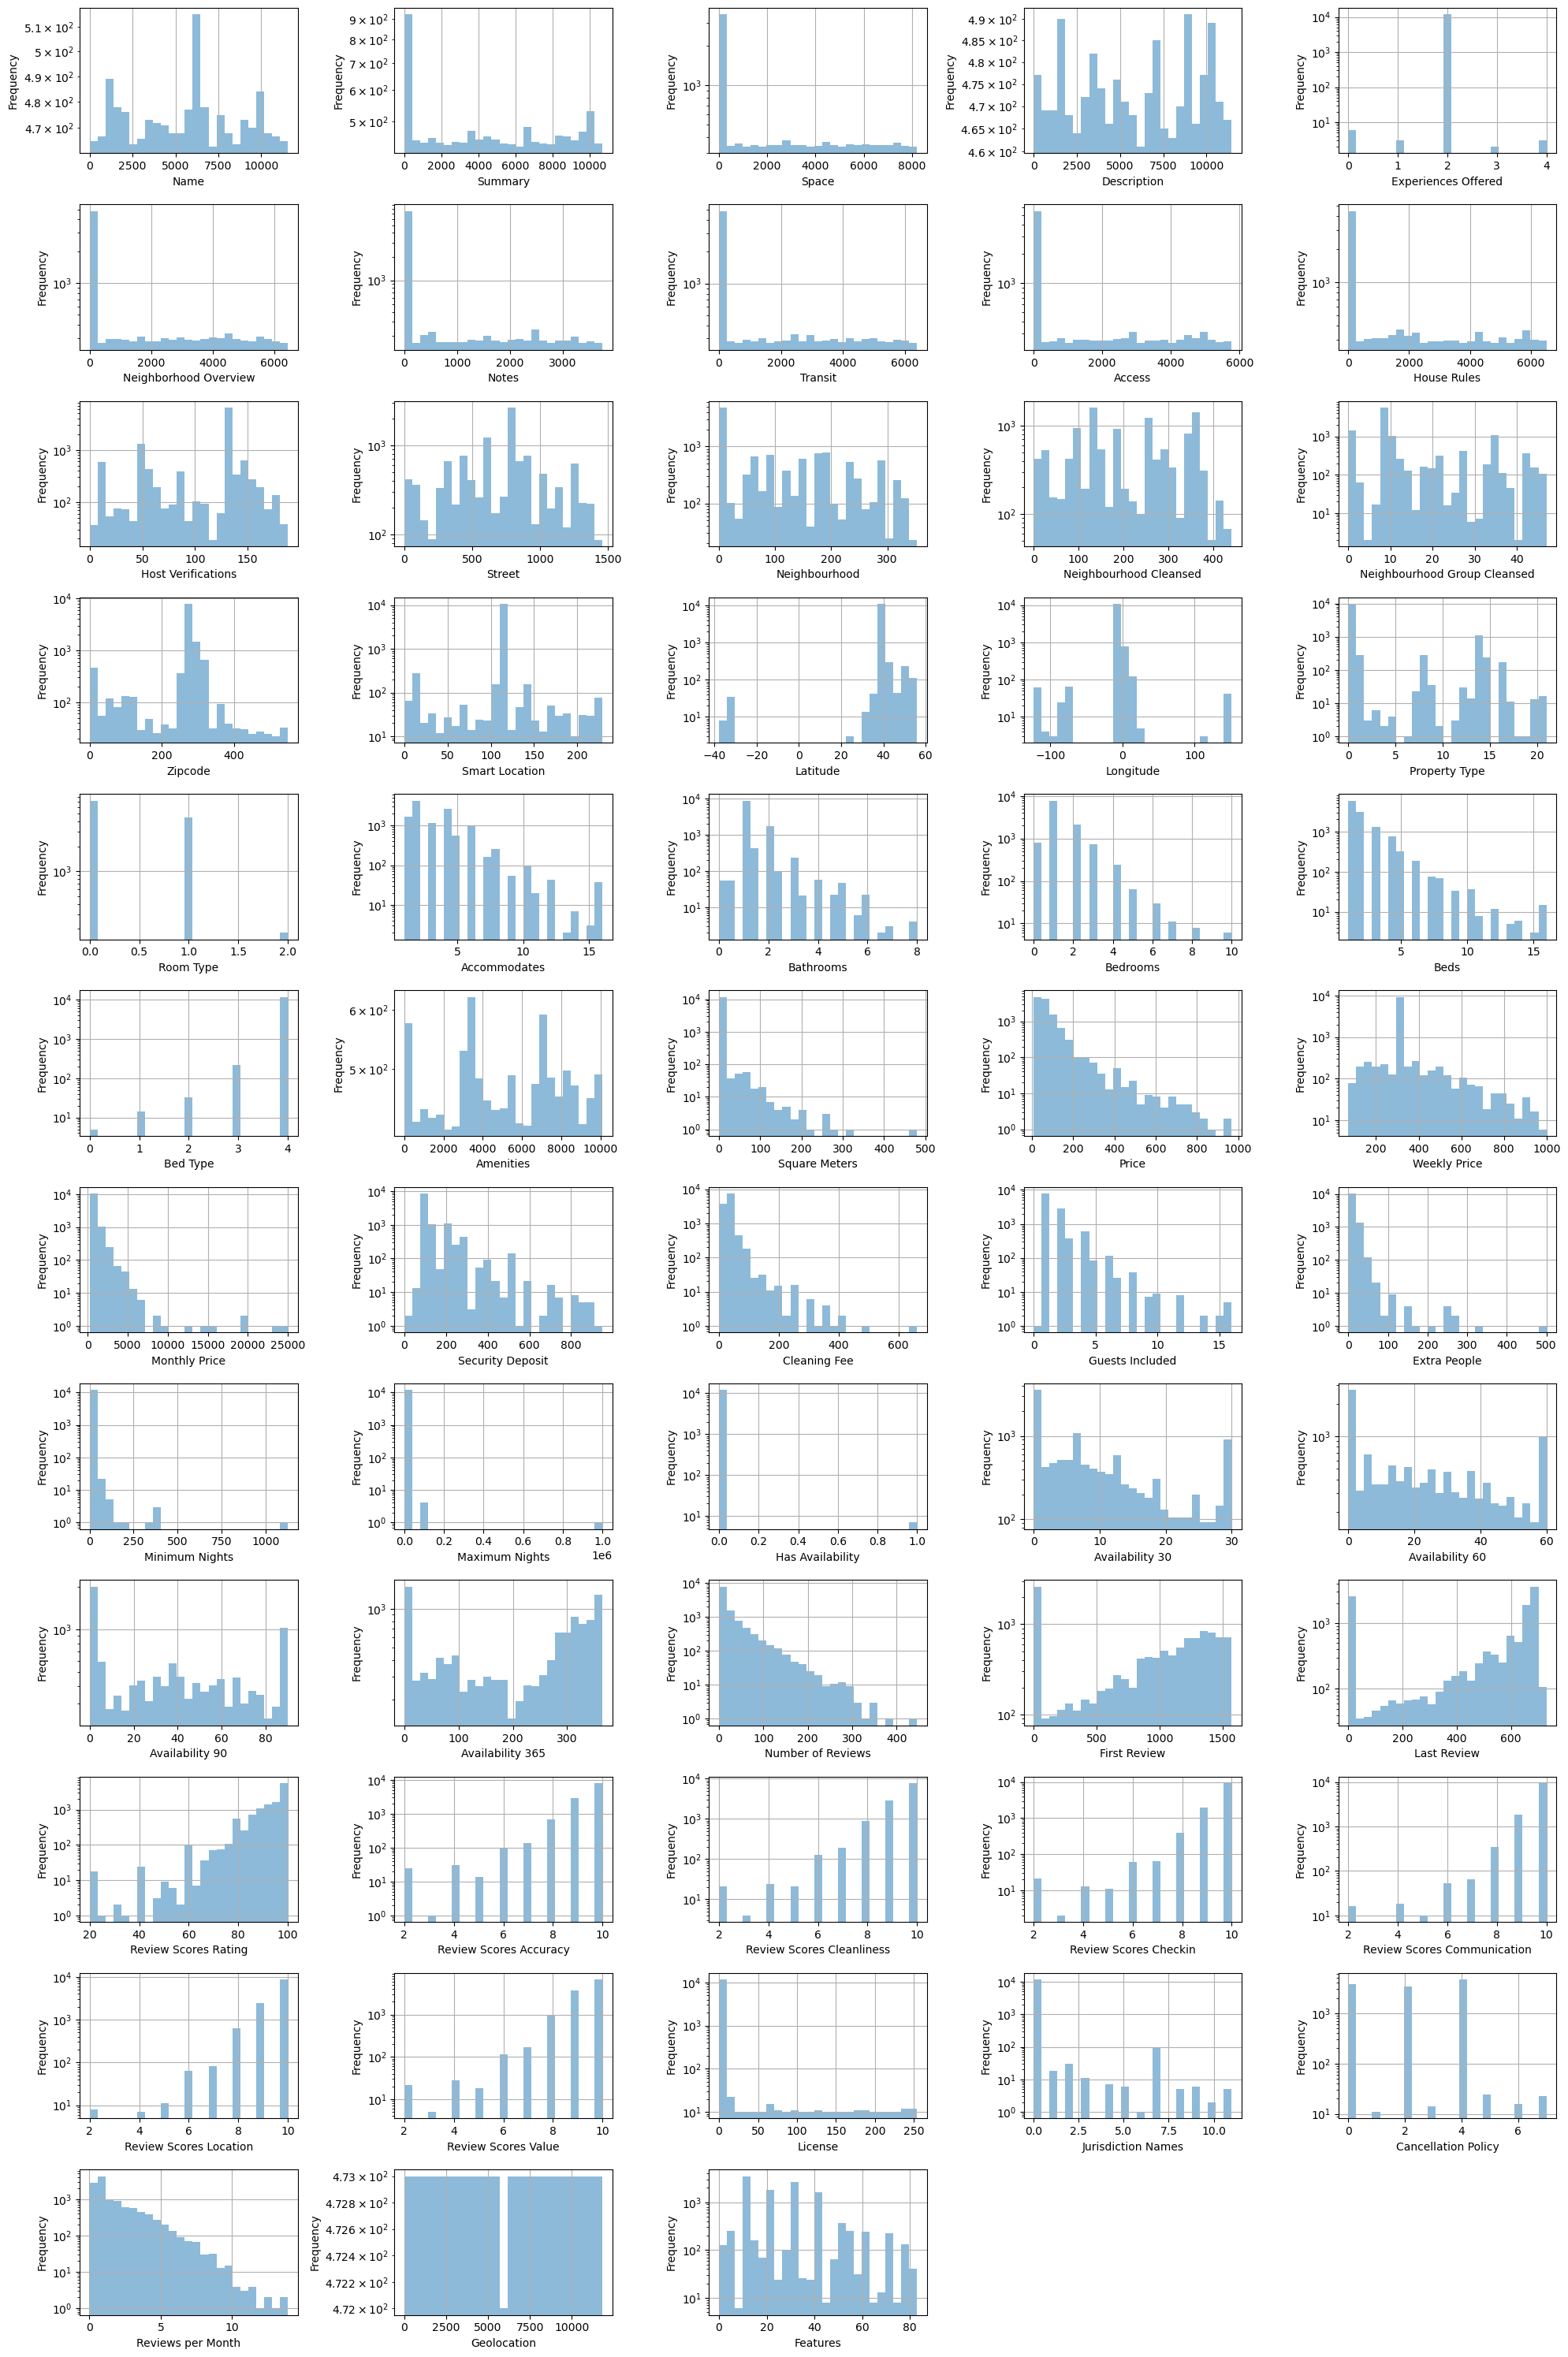

In [12]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 30))

# Bucle para trazar histogramas para cada variable
for i, column in enumerate(df_airbnb.columns, start=1):
    plt.subplot(12, 5, i)
    df_airbnb[column].plot.hist(alpha=0.5, bins=25, grid=True)
    plt.yscale("log")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

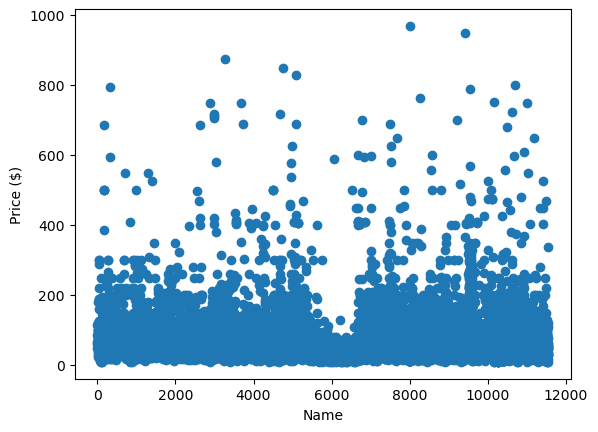

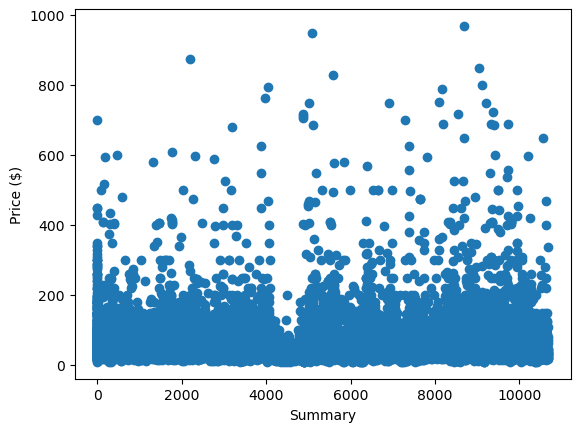

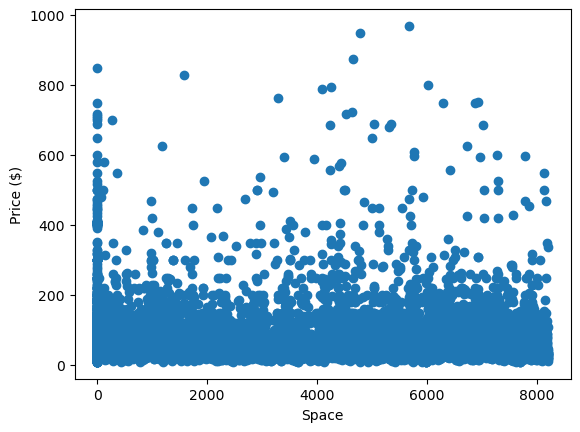

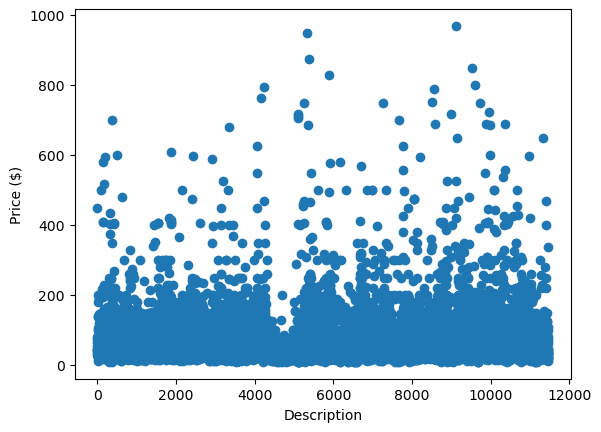

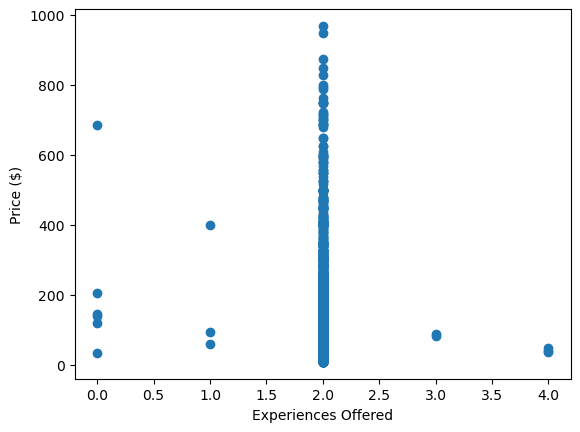

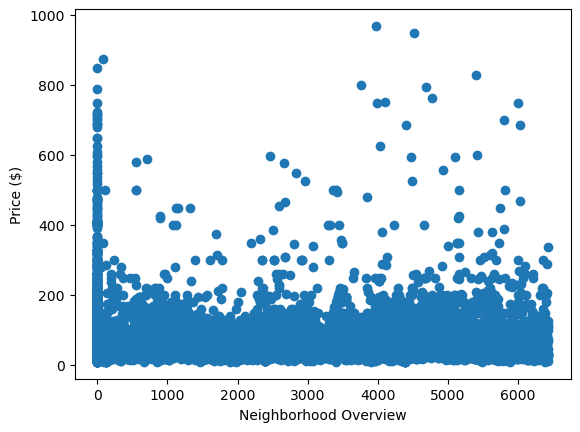

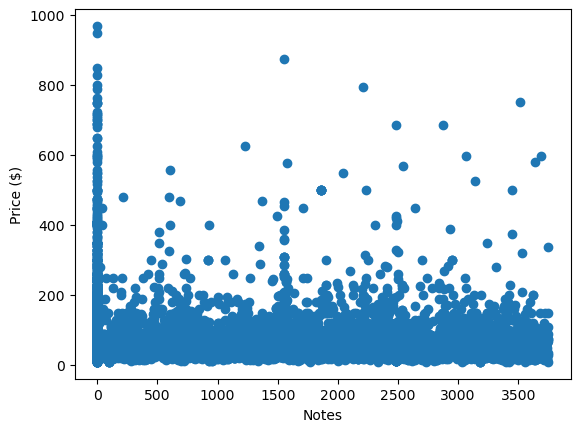

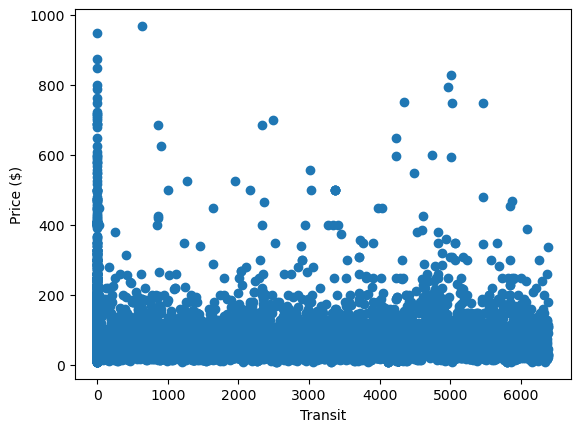

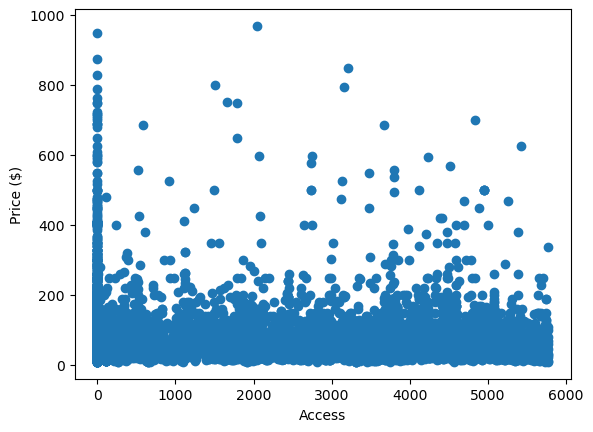

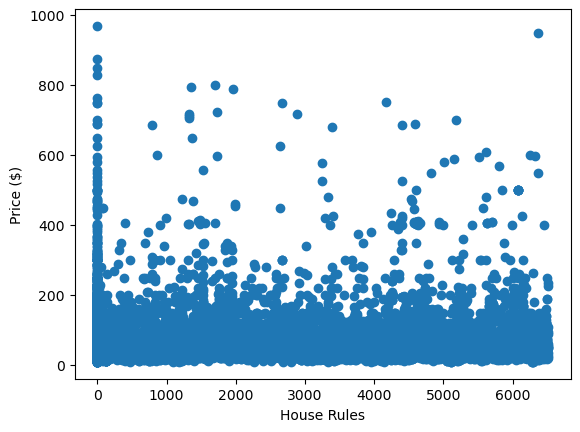

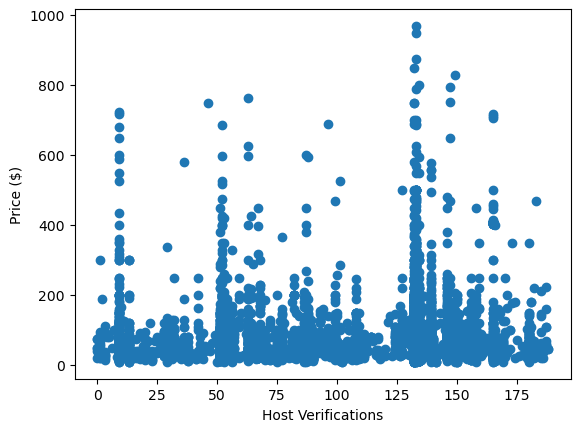

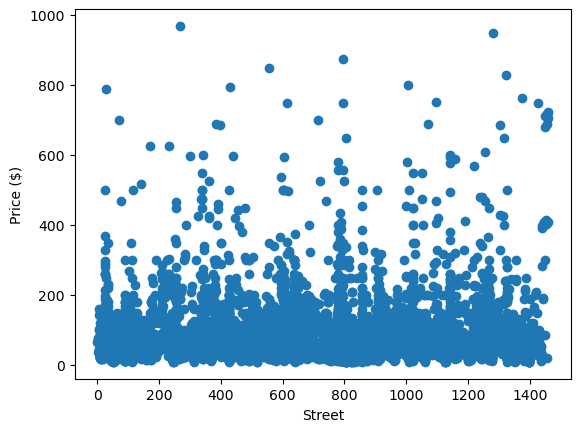

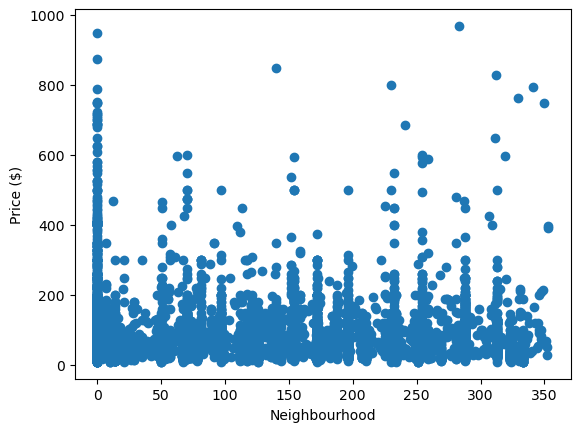

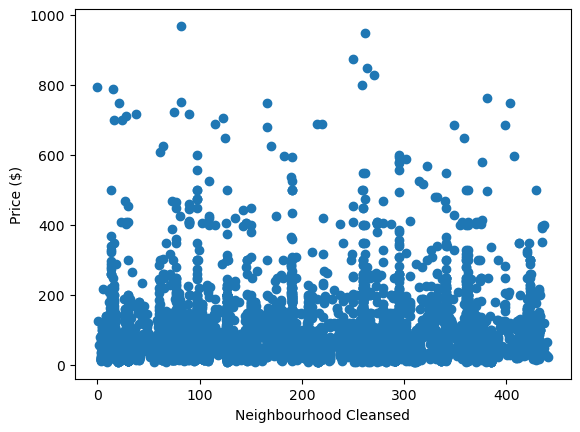

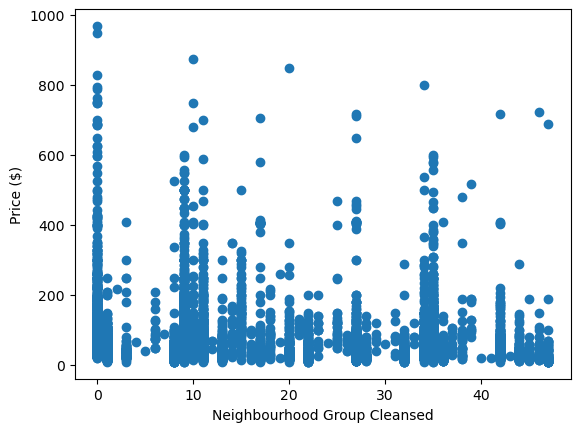

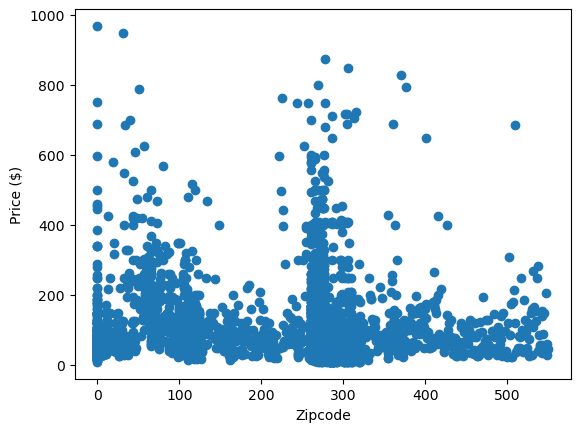

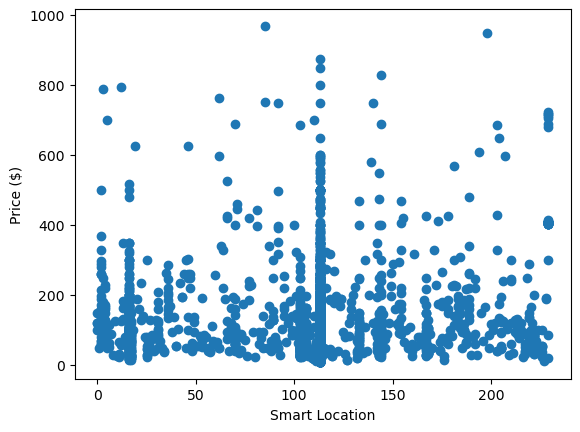

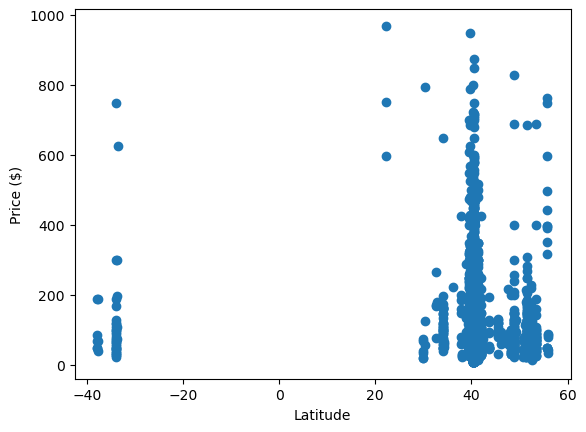

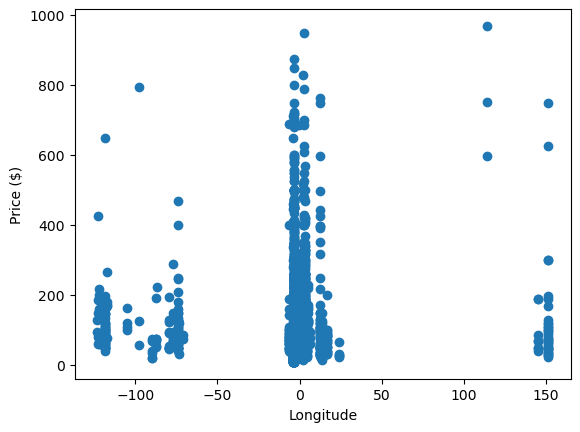

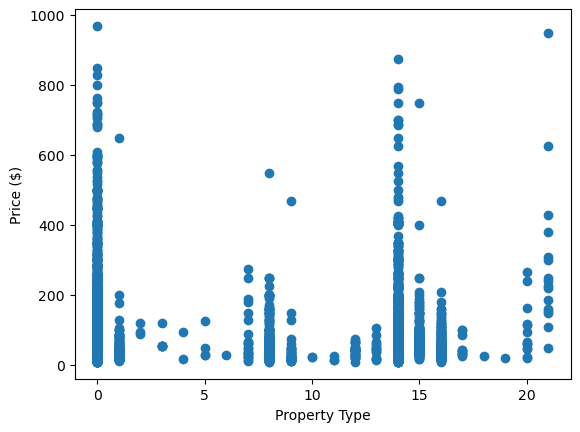

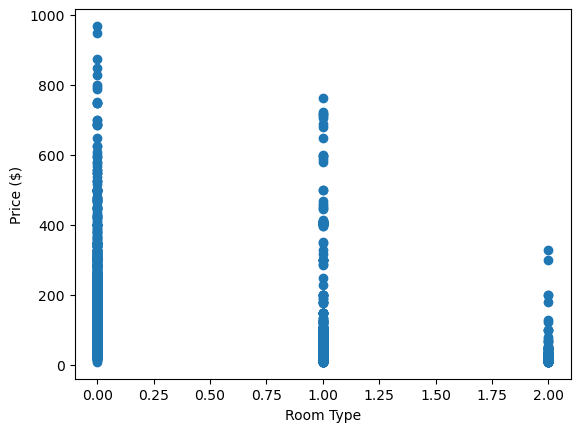

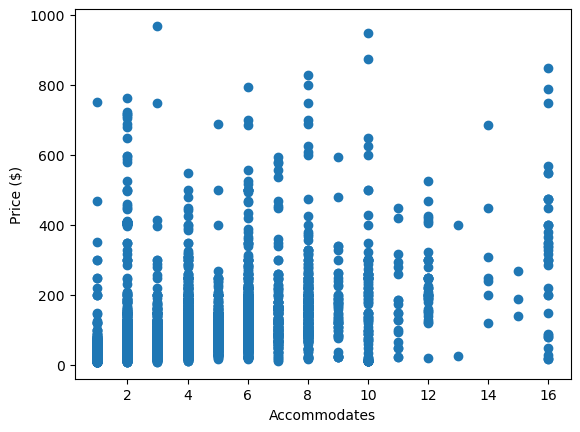

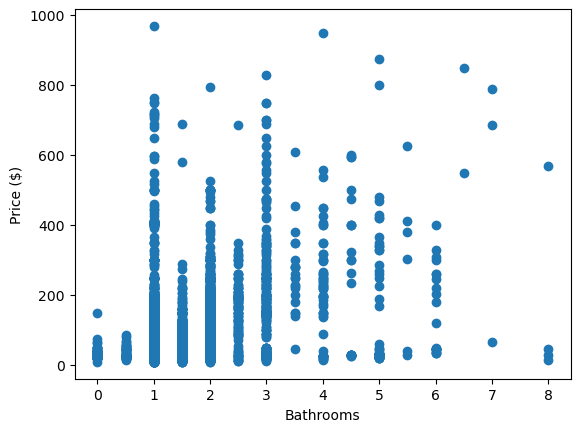

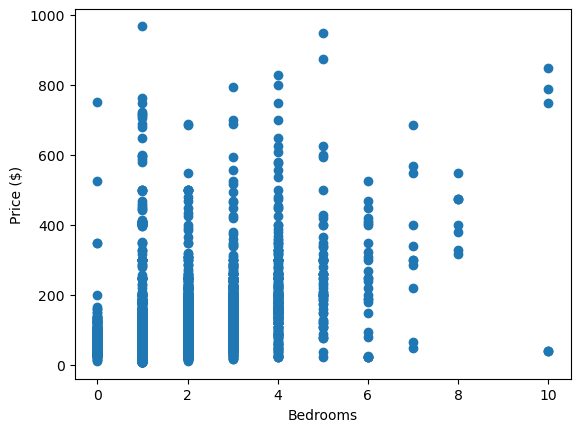

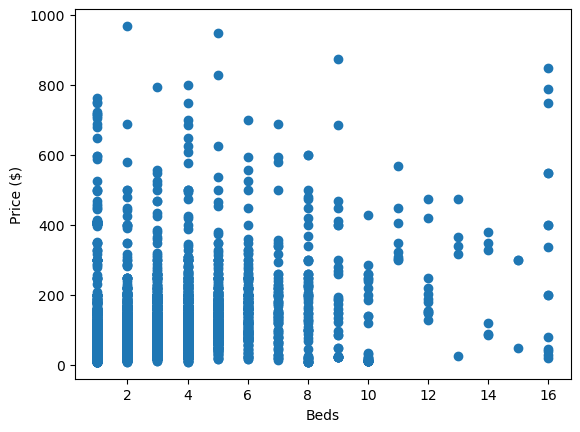

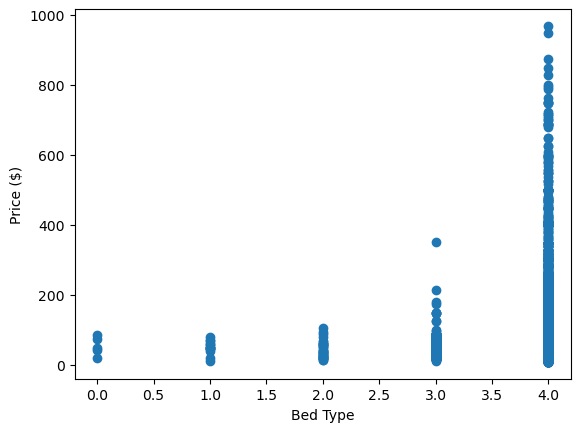

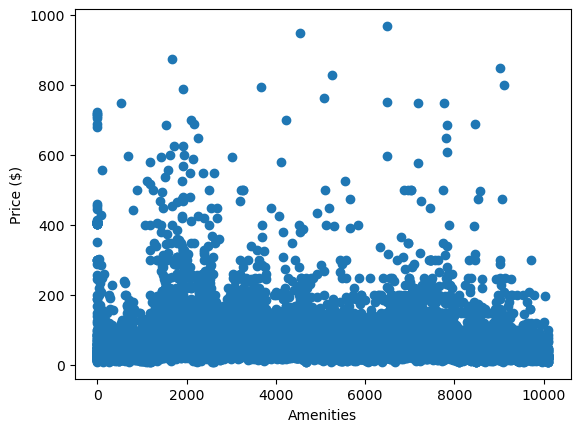

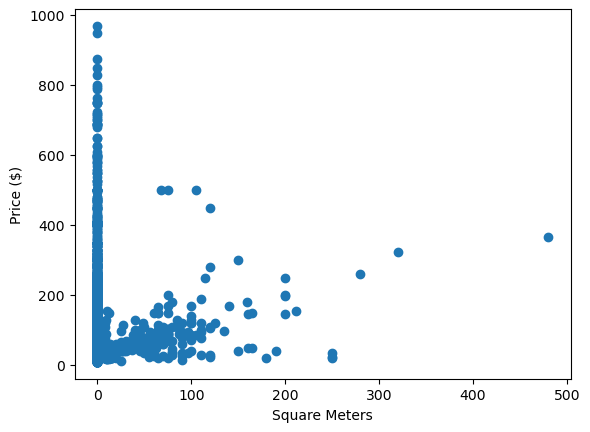

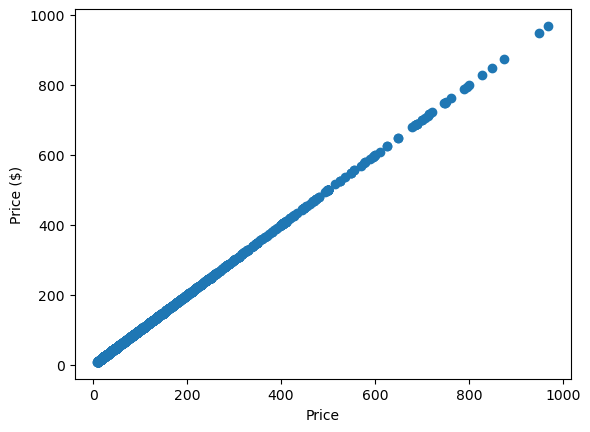

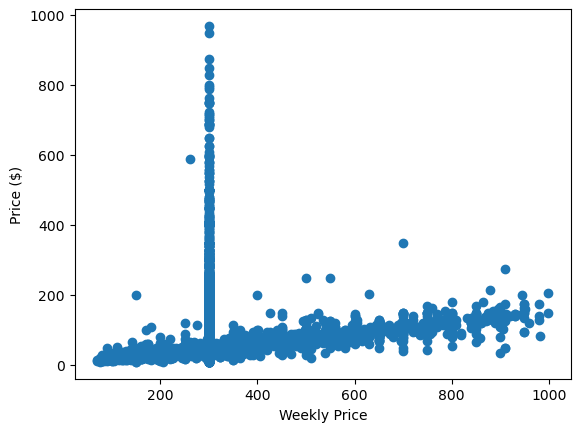

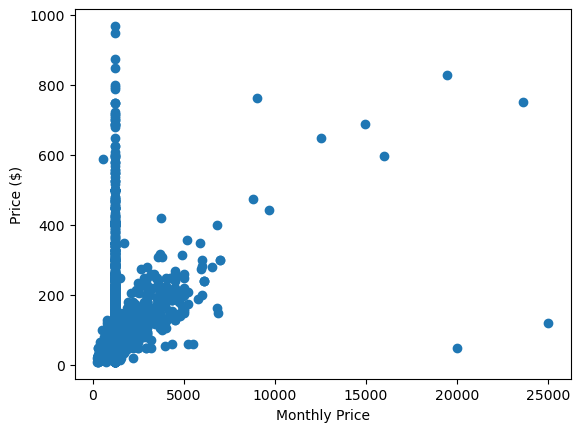

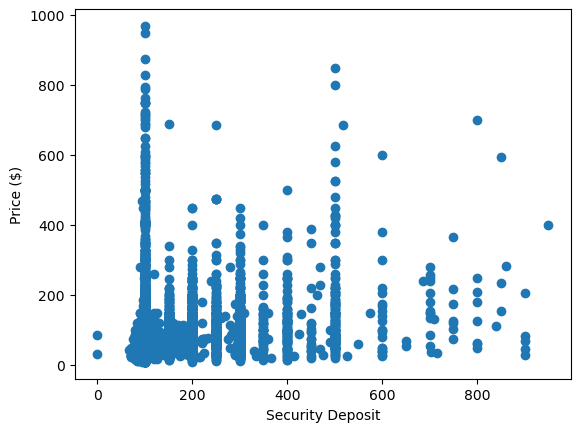

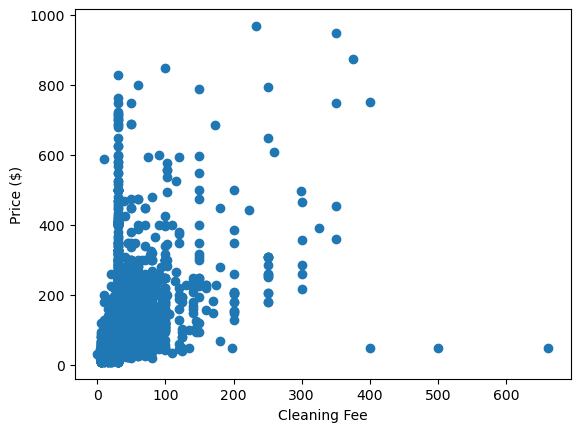

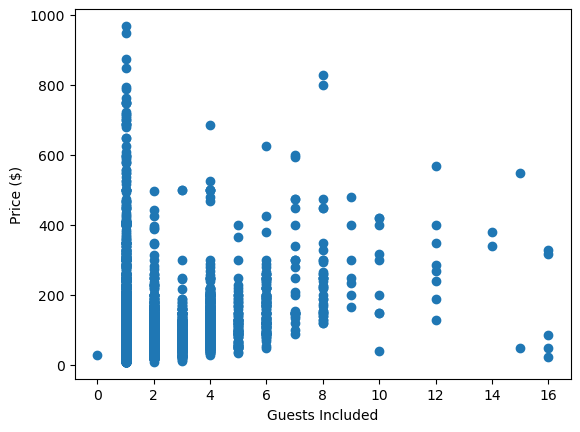

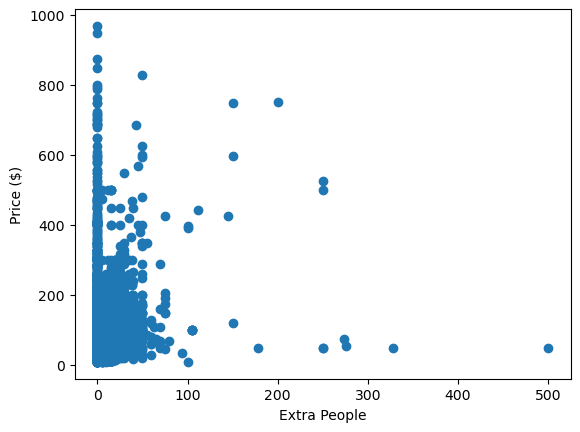

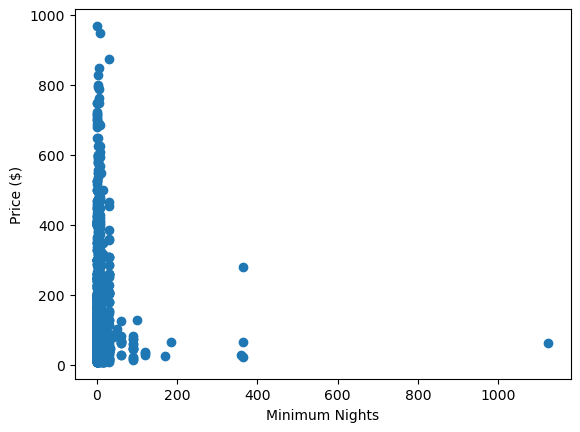

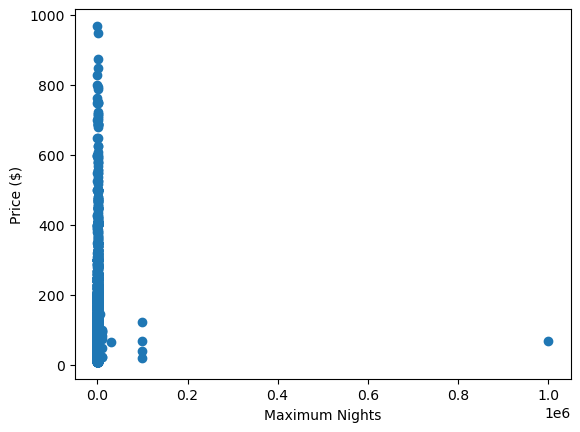

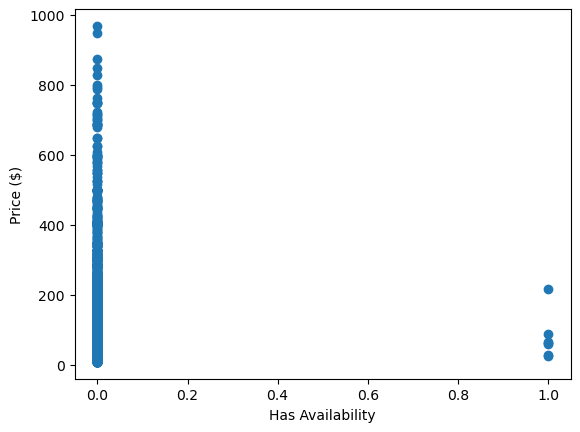

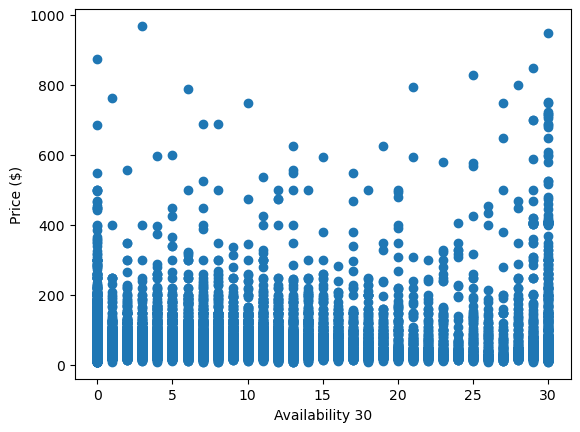

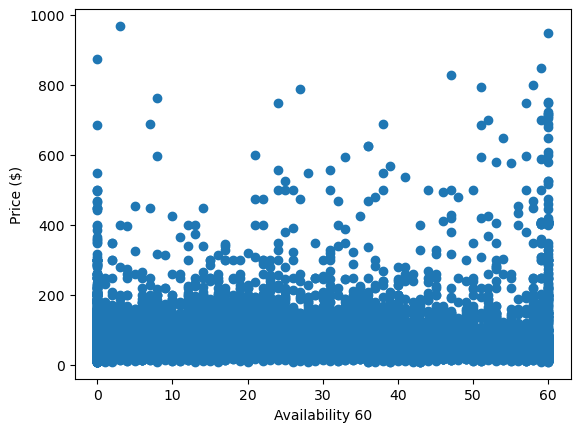

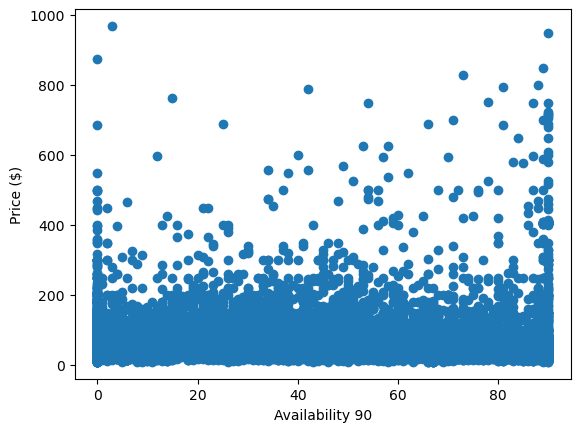

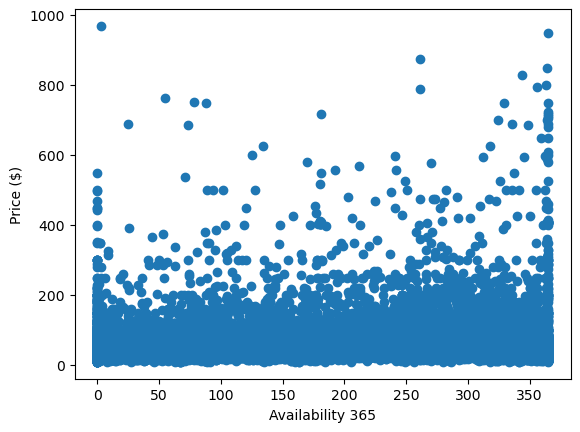

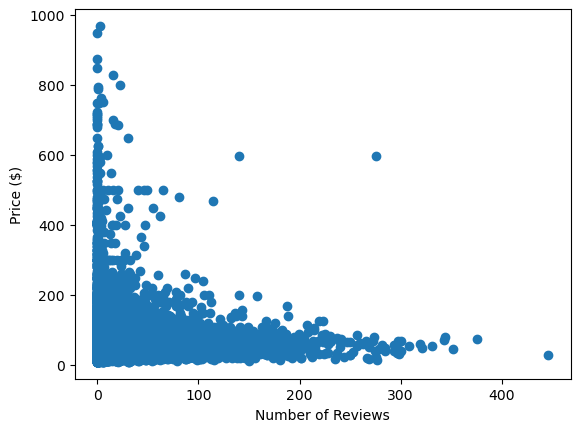

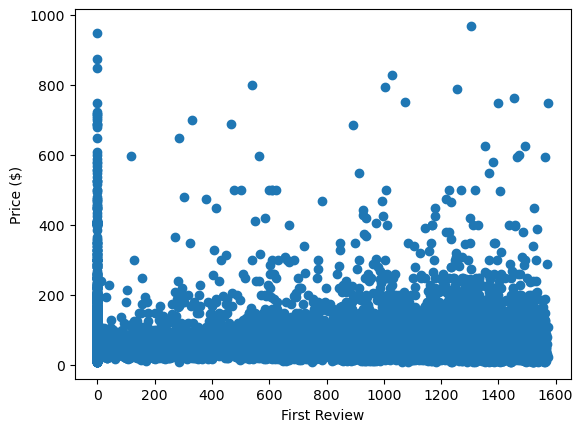

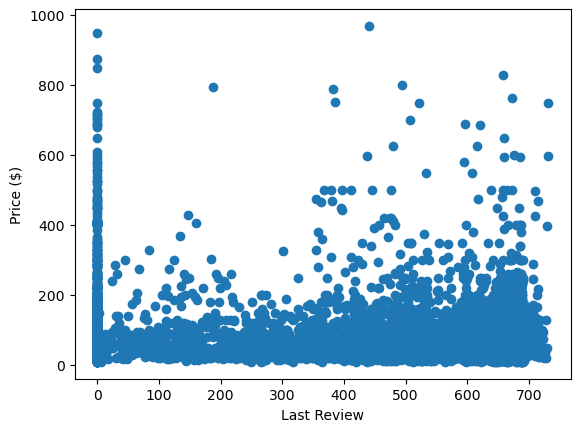

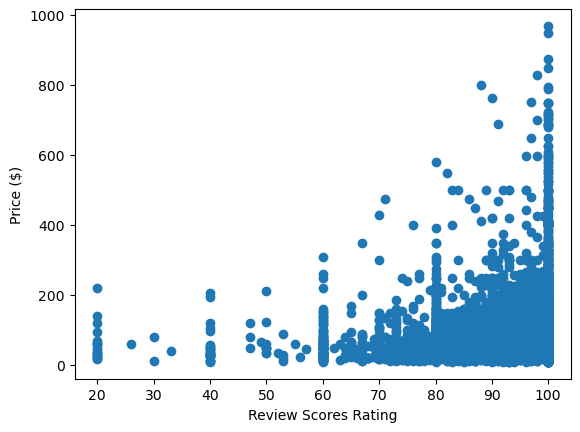

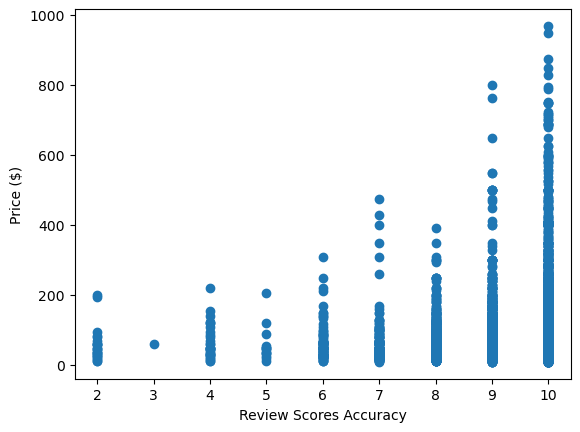

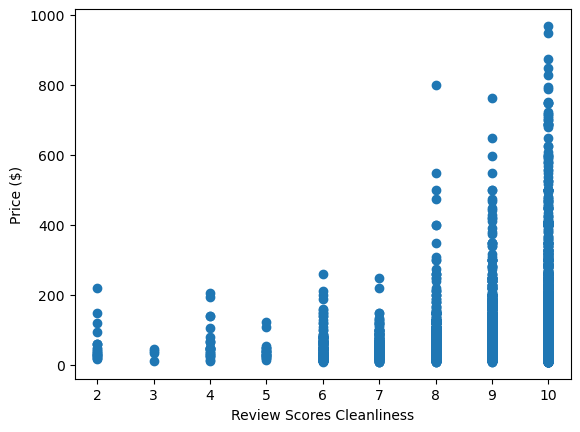

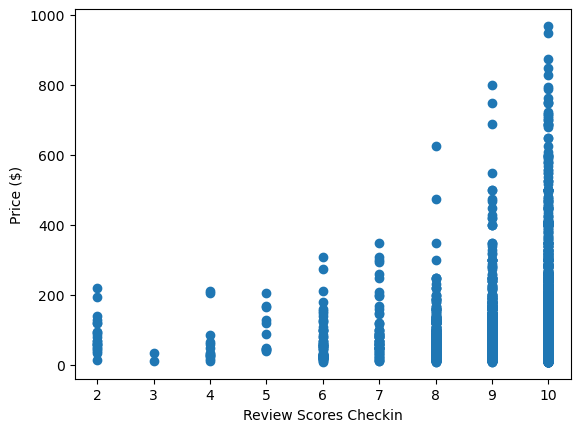

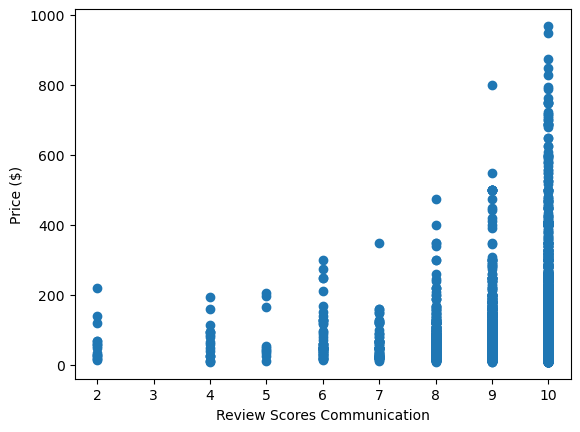

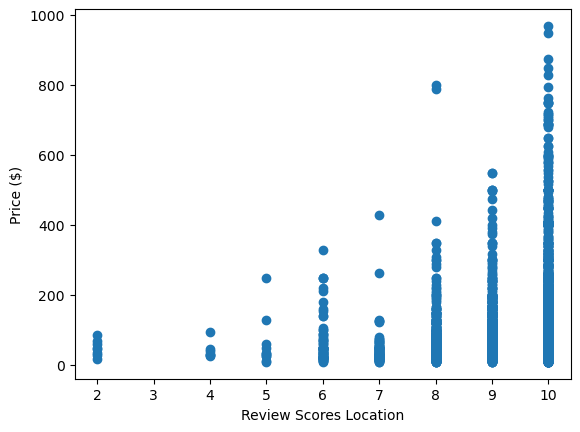

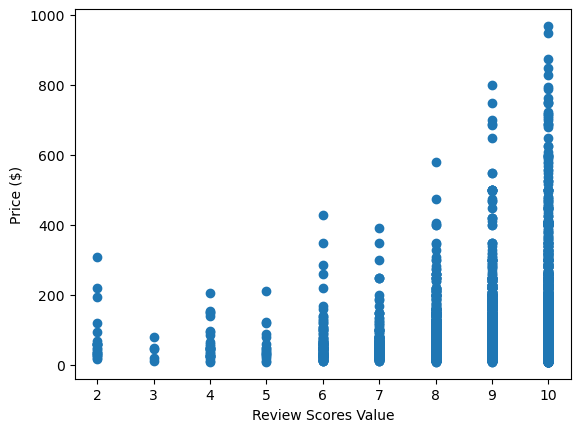

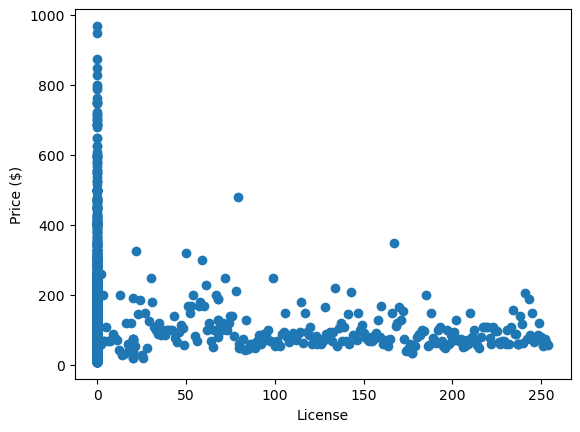

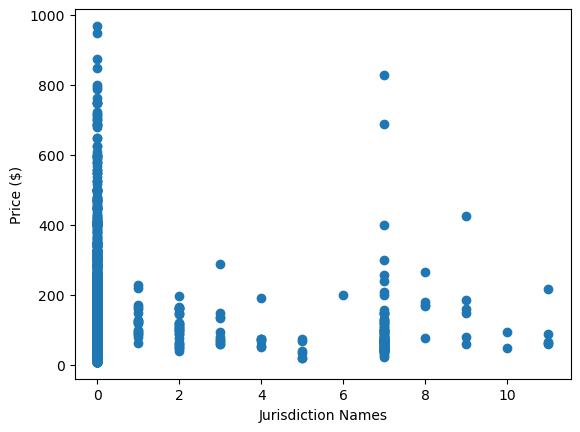

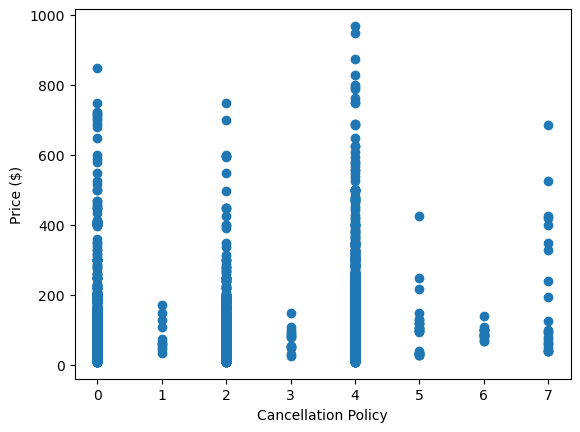

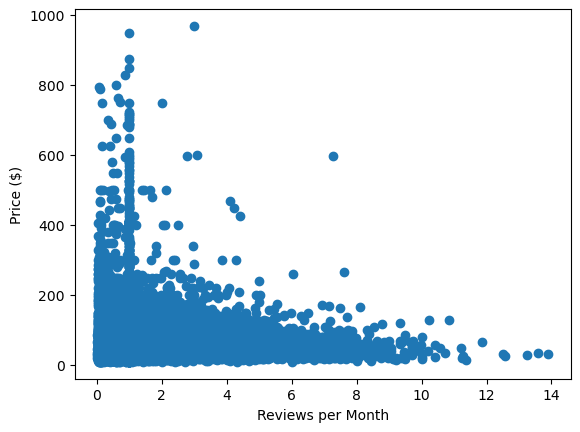

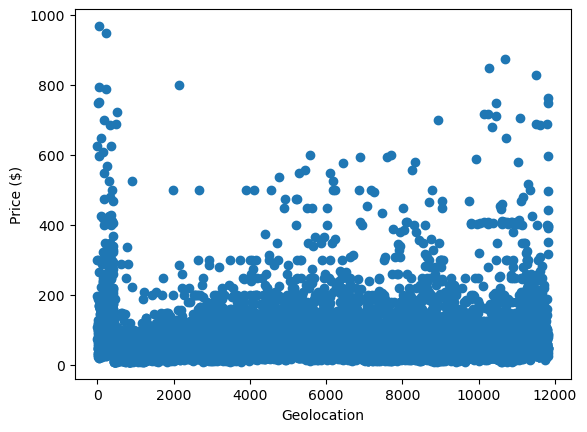

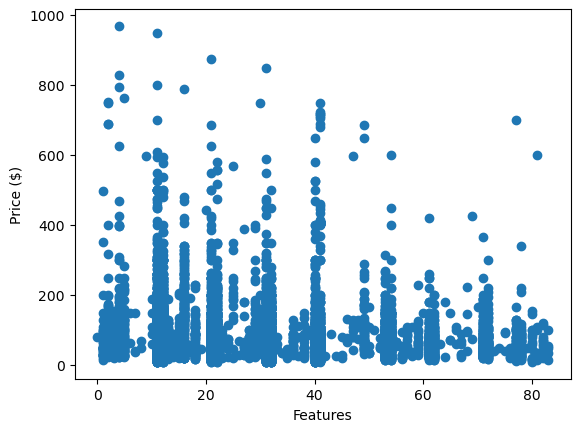

In [13]:
import matplotlib.pyplot as plt

# Lista de variables para trazar gráficos de dispersión
numeric_variables = ['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'House Rules',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Zipcode',
       'Smart Location', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Meters', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Reviews per Month', 'Geolocation', 'Features']


# Trazar gráficos de dispersión uno a uno
for var in numeric_variables:
    plt.scatter(df_airbnb[var], df_airbnb['Price'])
    plt.xlabel(var)
    plt.ylabel('Price ($)')
    plt.show()


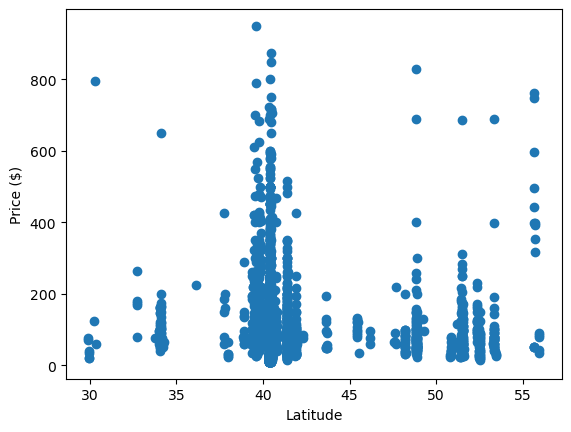

Original: 11824 // Modificado: 11779
Diferencia: 45
Variación: 0.380582%


In [15]:
df_airbnb__no_outliers_latitude = df_airbnb[df_airbnb['Latitude'] >= 25]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_latitude['Latitude'], df_airbnb__no_outliers_latitude['Price'])
plt.xlabel('Latitude')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_latitude.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_latitude.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_latitude.shape[0])/df_airbnb.shape[0])*100:2f}%')

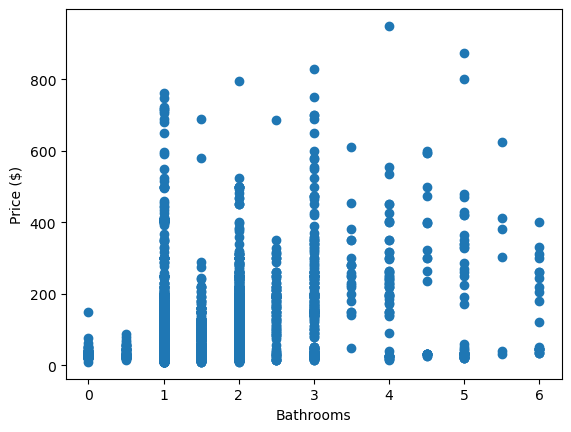

Original: 11779 // Modificado: 11770
Diferencia: 9
Variación: 0.076407%


In [17]:
df_airbnb__no_outliers_bathrooms = df_airbnb[df_airbnb['Bathrooms'] <= 6]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_bathrooms['Bathrooms'], df_airbnb__no_outliers_bathrooms['Price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_bathrooms.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_bathrooms.shape[0])/df_airbnb.shape[0])*100:2f}%')

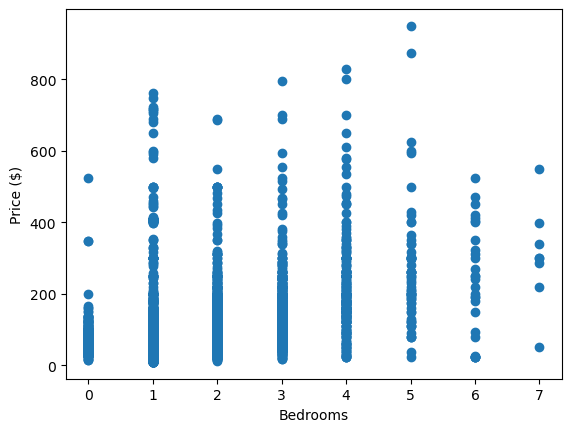

Original: 11770 // Modificado: 11759
Diferencia: 11
Variación: 0.093458%


In [19]:
df_airbnb__no_outliers_bedrooms = df_airbnb[df_airbnb['Bedrooms'] <= 7]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_bedrooms['Bedrooms'], df_airbnb__no_outliers_bedrooms['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_bedrooms.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_bedrooms.shape[0])/df_airbnb.shape[0])*100:2f}%')

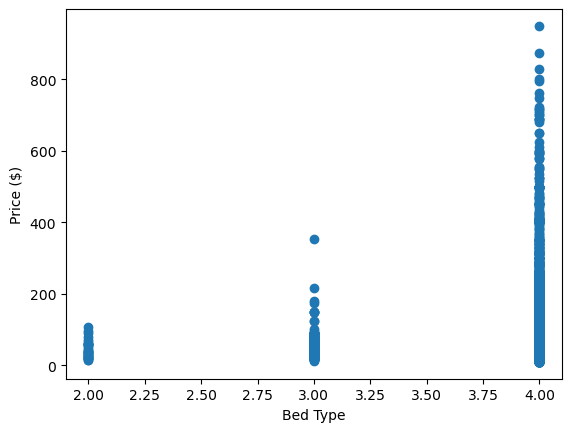

Original: 11759 // Modificado: 11740
Diferencia: 19
Variación: 0.161578%


In [21]:
df_airbnb__no_outliers_bed_type = df_airbnb[df_airbnb['Bed Type'] >= 2]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_bed_type['Bed Type'], df_airbnb__no_outliers_bed_type['Price'])
plt.xlabel('Bed Type')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_bed_type.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_bed_type.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_bed_type.shape[0])/df_airbnb.shape[0])*100:2f}%')

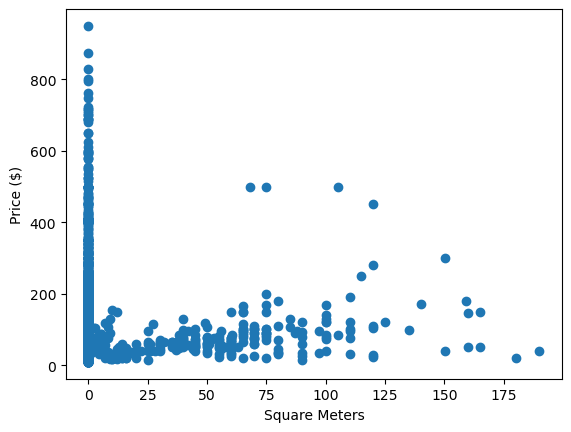

Original: 11740 // Modificado: 11729
Diferencia: 11
Variación: 0.093697%


In [23]:
df_airbnb__no_outliers_square_meters = df_airbnb[df_airbnb['Square Meters'] <= 200]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_square_meters['Square Meters'], df_airbnb__no_outliers_square_meters['Price'])
plt.xlabel('Square Meters')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_square_meters.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_square_meters.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_square_meters.shape[0])/df_airbnb.shape[0])*100:2f}%')

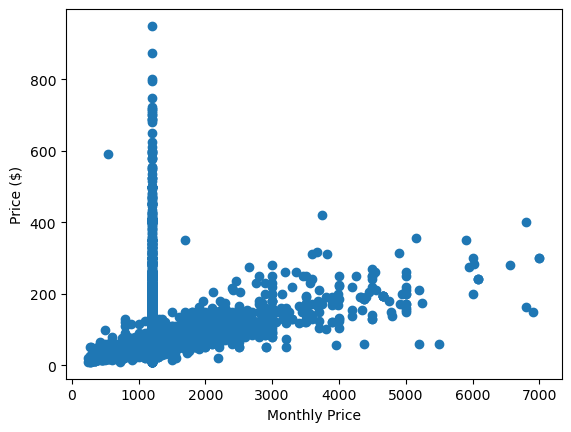

Original: 11729 // Modificado: 11722
Diferencia: 7
Variación: 0.059681%


In [25]:
df_airbnb__no_outliers_monthly_price = df_airbnb[df_airbnb['Monthly Price'] <= 8000]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_monthly_price['Monthly Price'], df_airbnb__no_outliers_monthly_price['Price'])
plt.xlabel('Monthly Price')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_monthly_price.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_monthly_price.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_monthly_price.shape[0])/df_airbnb.shape[0])*100:2f}%')

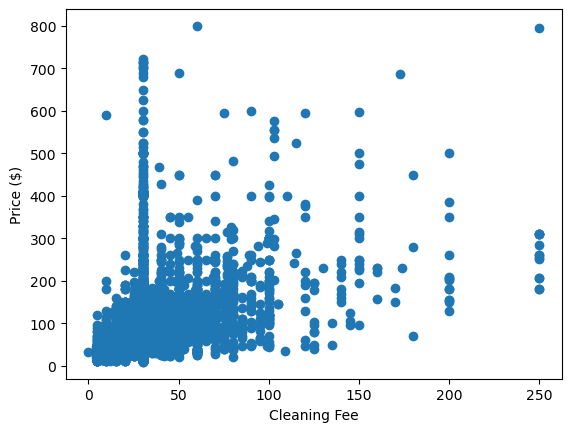

Original: 11722 // Modificado: 11706
Diferencia: 16
Variación: 0.136495%


In [27]:
df_airbnb__no_outliers_cleaning_fee = df_airbnb[df_airbnb['Cleaning Fee'] <= 250]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_cleaning_fee['Cleaning Fee'], df_airbnb__no_outliers_cleaning_fee['Price'])
plt.xlabel('Cleaning Fee')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_cleaning_fee.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_cleaning_fee.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_cleaning_fee.shape[0])/df_airbnb.shape[0])*100:2f}%')

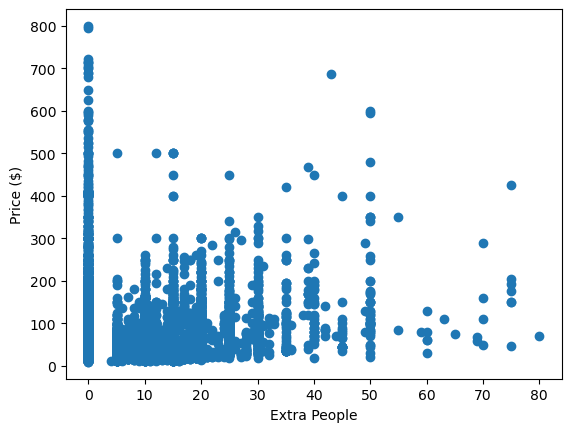

Original: 11706 // Modificado: 11690
Diferencia: 16
Variación: 0.136682%


In [29]:
df_airbnb__no_outliers_extra_people = df_airbnb[df_airbnb['Extra People'] <= 80]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_extra_people['Extra People'], df_airbnb__no_outliers_extra_people['Price'])
plt.xlabel('Extra People')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_extra_people.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_extra_people.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_extra_people.shape[0])/df_airbnb.shape[0])*100:2f}%')

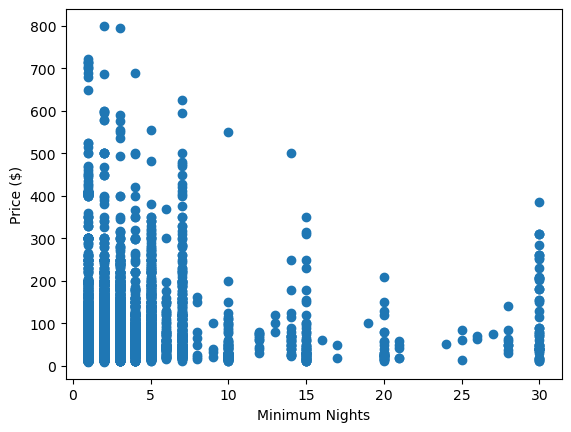

Original: 11690 // Modificado: 11652
Diferencia: 38
Variación: 0.325064%


In [31]:
df_airbnb__no_outliers_minimum_nights = df_airbnb[df_airbnb['Minimum Nights'] <= 30]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_minimum_nights['Minimum Nights'], df_airbnb__no_outliers_minimum_nights['Price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_minimum_nights.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_minimum_nights.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_minimum_nights.shape[0])/df_airbnb.shape[0])*100:2f}%')

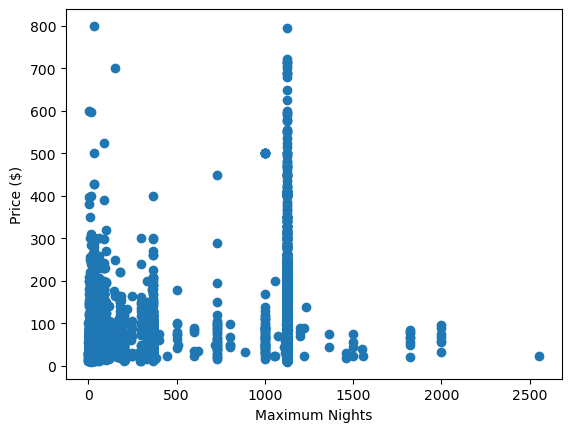

Original: 11652 // Modificado: 11636
Diferencia: 16
Variación: 0.137315%


In [33]:
df_airbnb__no_outliers_maximum_nights = df_airbnb[df_airbnb['Maximum Nights'] <= 4000]

# Trazar el gráfico de dispersión
plt.scatter(df_airbnb__no_outliers_maximum_nights['Maximum Nights'], df_airbnb__no_outliers_maximum_nights['Price'])
plt.xlabel('Maximum Nights')
plt.ylabel('Price ($)')
plt.show()

print(
    f'Original: {df_airbnb.shape[0]} // '
    f'Modificado: {df_airbnb__no_outliers_maximum_nights.shape[0]}\nDiferencia: {df_airbnb.shape[0] - df_airbnb__no_outliers_maximum_nights.shape[0]}'
)
print(f'Variación: {((df_airbnb.shape[0] - df_airbnb__no_outliers_maximum_nights.shape[0])/df_airbnb.shape[0])*100:2f}%')

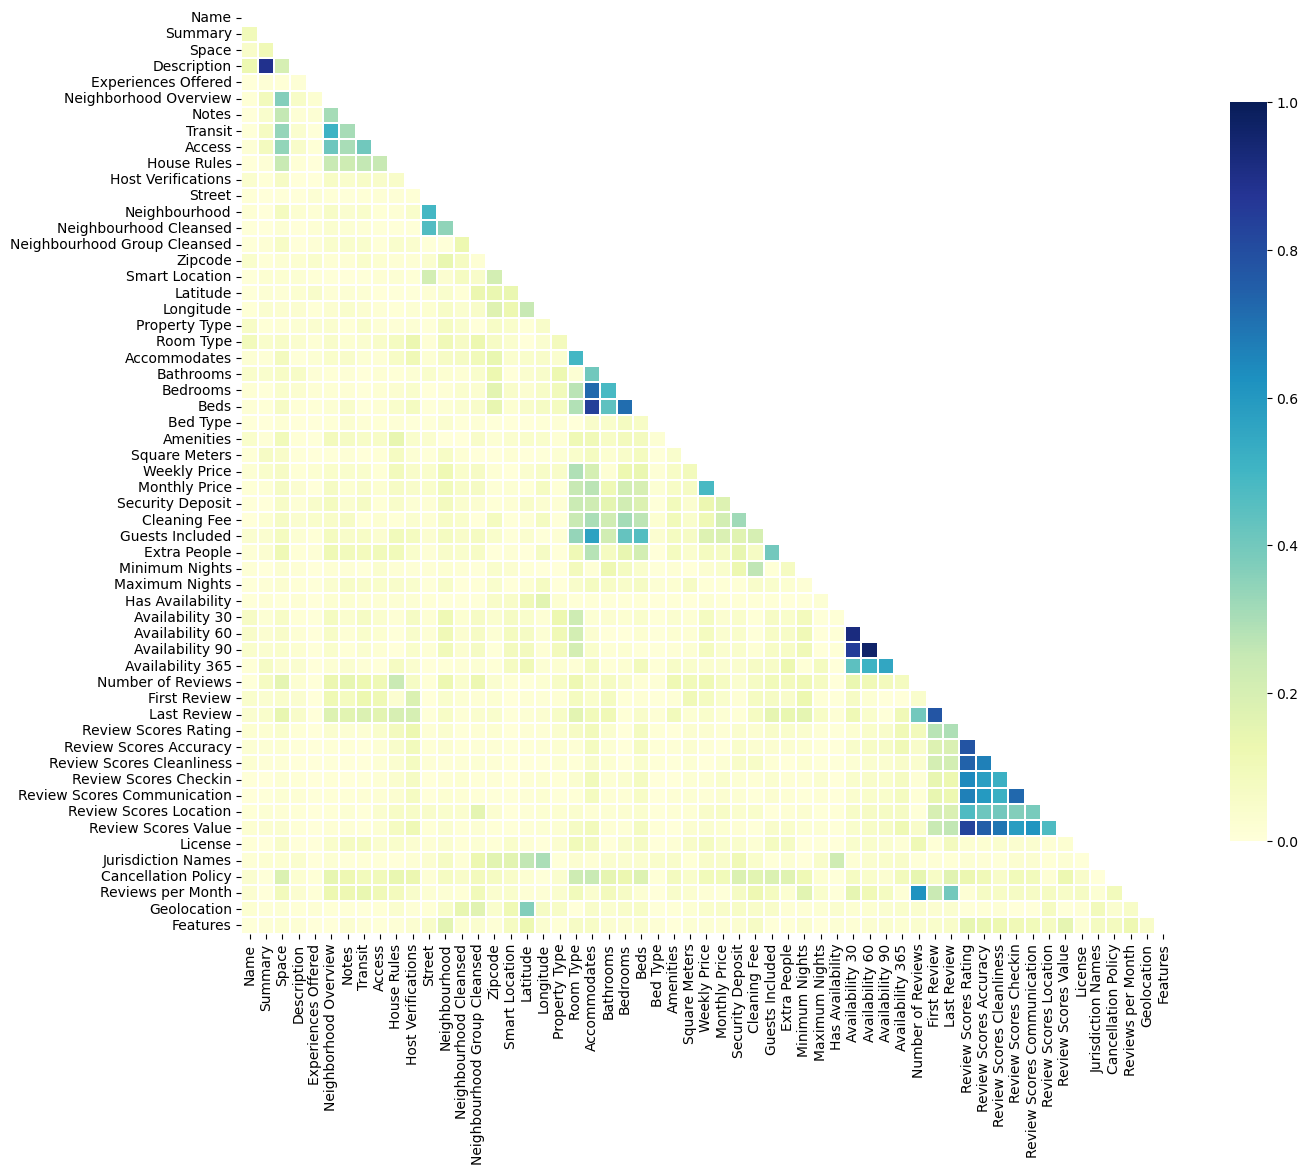

In [35]:
import seaborn as sns

# Calcular la matriz de correlación
corr = np.abs(df_airbnb.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(15, 12))

# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

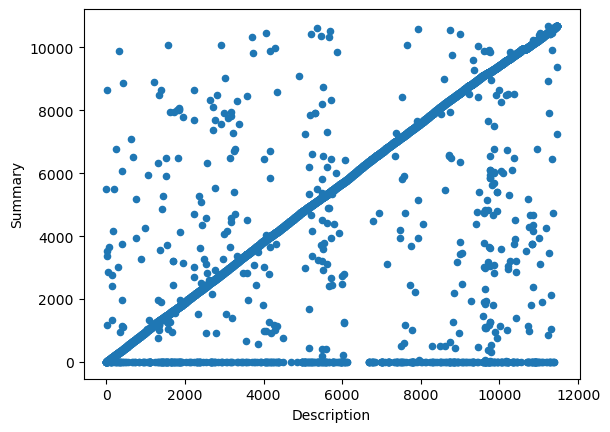

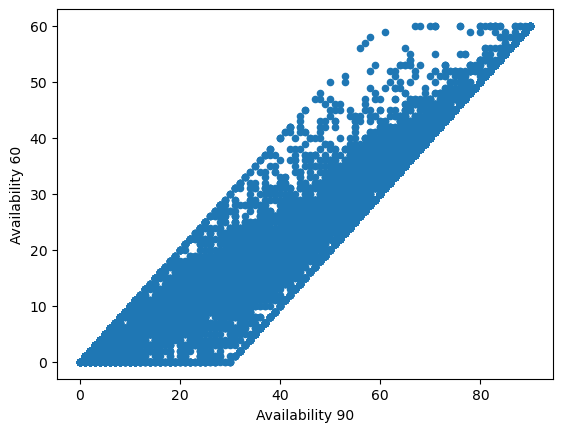

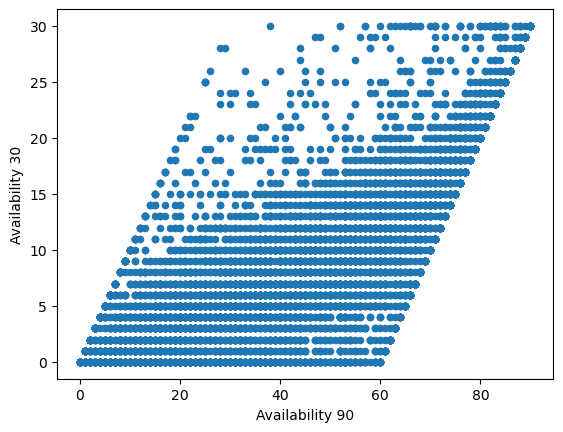

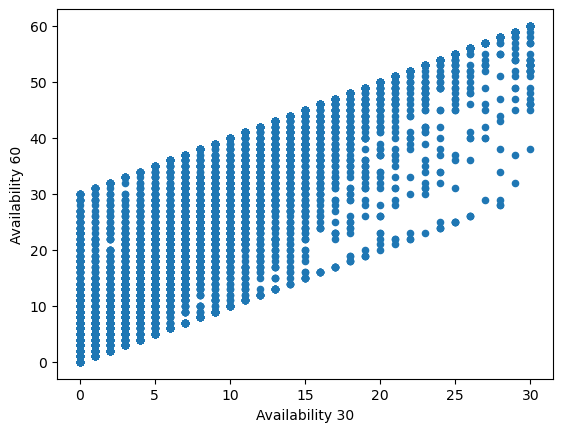

In [54]:
# Observando gráficamente la correlación entre variables

df_airbnb.plot(kind = 'scatter',x='Description',y = 'Summary')
plt.xlabel('Description')
plt.ylabel('Summary')
plt.show()

df_airbnb.plot(kind = 'scatter',x='Availability 90',y = 'Availability 60')
plt.xlabel('Availability 90')
plt.ylabel('Availability 60')
plt.show()

df_airbnb.plot(kind = 'scatter',x='Availability 90',y = 'Availability 30')
plt.xlabel('Availability 90')
plt.ylabel('Availability 30')
plt.show()

df_airbnb.plot(kind = 'scatter',x='Availability 30',y = 'Availability 60')
plt.xlabel('Availability 30')
plt.ylabel('Availability 60')
plt.show()

In [50]:
# Valor de la Correlación entre las columnas
correlation_matrix = df_airbnb[['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']].corr()
print(correlation_matrix)

corr = df_airbnb[['Description', 'Summary']].corr()
print(corr)


                  Availability 30  Availability 60  Availability 90  \
Availability 30          1.000000         0.921515         0.851356   
Availability 60          0.921515         1.000000         0.964212   
Availability 90          0.851356         0.964212         1.000000   
Availability 365         0.442840         0.509319         0.554119   

                  Availability 365  
Availability 30           0.442840  
Availability 60           0.509319  
Availability 90           0.554119  
Availability 365          1.000000  
             Description   Summary
Description     1.000000  0.886996
Summary         0.886996  1.000000


In [55]:
# Observando anteriormente la correlación tanto gráficamente como analitícamente, he decidido quitar Summary, Availability 30 y Availability 60. 
# Manteniendo la variable Description y Availability 90(he elegido esta ya que la disponibilidad en 90 días tiene una alta correlación con la 
# disponibilidad de 30 y 60 días, y aparte abarca más datos que si me quedara con la de 30 o 60)

df_airbnb = df_airbnb.drop(['Availability 30', 'Availability 60', 'Summary'], axis=1)

## Preprocesamiento en Train

In [41]:
# Carga de datos de Test
df_airbnb = pd.read_csv('C:/Users/carlo/Downloads/airbnb-listings-train.csv', sep=';', decimal='.')

# Imputación de variables
columnas_numericas = ['Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
                      'Security Deposit', 'Cleaning Fee', 'Review Scores Rating',
                      'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 
                      'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
                      'Calculated host listings count', 'Reviews per Month', 'Host Listings Count', 'Host Total Listings Count', 'Host Response Rate']

for columna in columnas_numericas:
    df_airbnb[columna].fillna(df_airbnb[columna].mode()[0], inplace=True)

    
columnas_objeto = ['Picture Url', 'XL Picture Url', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Neighbourhood',
                    'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Amenities', 'Has Availability', 'First Review',
                    'Last Review', 'License', 'Jurisdiction Names', 'Features', 'Space', 'Name', 'Summary', 'Description', 'Neighborhood Overview', 
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url']


for columna in columnas_objeto:
    df_airbnb[columna] = df_airbnb[columna].fillna('')
    
    

# Eliminación de columnas irrelevantes   
    
df_airbnb = df_airbnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                            'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                           'Calendar last Scraped', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                           'Host Acceptance Rate', 'Calendar Updated', 'Host Neighbourhood', 'City', 'Market', 'State', 'Country', 'Country Code',
                            'Interaction', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
                            'Calculated host listings count'], axis=1)


# CODIFICACIÓN DE VARIABLES

from sklearn import preprocessing

# Crear una instancia de LabelEncoder para cada variable categórica
le_Name = preprocessing.LabelEncoder()
le_Summary = preprocessing.LabelEncoder()
le_Space = preprocessing.LabelEncoder()
le_Description = preprocessing.LabelEncoder()
le_Experiences_Offered = preprocessing.LabelEncoder()
le_Neighborhood_Overview = preprocessing.LabelEncoder()
le_Notes = preprocessing.LabelEncoder()
le_Transit = preprocessing.LabelEncoder()
le_Access = preprocessing.LabelEncoder()
le_House_Rules = preprocessing.LabelEncoder()
le_Host_Verifications = preprocessing.LabelEncoder()
le_Street = preprocessing.LabelEncoder()
le_Neighbourhood = preprocessing.LabelEncoder()
le_Neighbourhood_Cleansed = preprocessing.LabelEncoder()
le_Neighbourhood_Group_Cleansed = preprocessing.LabelEncoder()
le_Zipcode = preprocessing.LabelEncoder()
le_Smart_Location = preprocessing.LabelEncoder()
le_Property_Type = preprocessing.LabelEncoder()
le_Room_Type = preprocessing.LabelEncoder()
le_Bed_Type = preprocessing.LabelEncoder()
le_Amenities = preprocessing.LabelEncoder()
le_Has_Availability = preprocessing.LabelEncoder()
le_First_Review = preprocessing.LabelEncoder()
le_Last_Review = preprocessing.LabelEncoder()
le_License = preprocessing.LabelEncoder()
le_Jurisdiction_Names = preprocessing.LabelEncoder()
le_Cancellation_Policy = preprocessing.LabelEncoder()
le_Geolocation = preprocessing.LabelEncoder()
le_Features = preprocessing.LabelEncoder()

# Ajustar y transformar cada variable categórica
df_airbnb['Name'] = le_Name.fit_transform(df_airbnb['Name'])
df_airbnb['Summary'] = le_Summary.fit_transform(df_airbnb['Summary'])
df_airbnb['Space'] = le_Space.fit_transform(df_airbnb['Space'])
df_airbnb['Description'] = le_Description.fit_transform(df_airbnb['Description'])
df_airbnb['Experiences Offered'] = le_Experiences_Offered.fit_transform(df_airbnb['Experiences Offered'])
df_airbnb['Neighborhood Overview'] = le_Neighborhood_Overview.fit_transform(df_airbnb['Neighborhood Overview'])
df_airbnb['Notes'] = le_Notes.fit_transform(df_airbnb['Notes'])
df_airbnb['Transit'] = le_Transit.fit_transform(df_airbnb['Transit'])
df_airbnb['Access'] = le_Access.fit_transform(df_airbnb['Access'])
df_airbnb['House Rules'] = le_House_Rules.fit_transform(df_airbnb['House Rules'])
df_airbnb['Host Verifications'] = le_Host_Verifications.fit_transform(df_airbnb['Host Verifications'])
df_airbnb['Street'] = le_Street.fit_transform(df_airbnb['Street'])
df_airbnb['Neighbourhood'] = le_Neighbourhood.fit_transform(df_airbnb['Neighbourhood'])
df_airbnb['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(df_airbnb['Neighbourhood Cleansed'])
df_airbnb['Neighbourhood Group Cleansed'] = le_Neighbourhood_Group_Cleansed.fit_transform(df_airbnb['Neighbourhood Group Cleansed'])
df_airbnb['Zipcode'] = le_Zipcode.fit_transform(df_airbnb['Zipcode'])
df_airbnb['Smart Location'] = le_Smart_Location.fit_transform(df_airbnb['Smart Location'])
df_airbnb['Property Type'] = le_Property_Type.fit_transform(df_airbnb['Property Type'])
df_airbnb['Room Type'] = le_Room_Type.fit_transform(df_airbnb['Room Type'])
df_airbnb['Bed Type'] = le_Bed_Type.fit_transform(df_airbnb['Bed Type'])
df_airbnb['Amenities'] = le_Amenities.fit_transform(df_airbnb['Amenities'])
df_airbnb['Has Availability'] = le_Has_Availability.fit_transform(df_airbnb['Has Availability'])
df_airbnb['First Review'] = le_First_Review.fit_transform(df_airbnb['First Review'])
df_airbnb['Last Review'] = le_Last_Review.fit_transform(df_airbnb['Last Review'])
df_airbnb['License'] = le_License.fit_transform(df_airbnb['License'])
df_airbnb['Jurisdiction Names'] = le_Jurisdiction_Names.fit_transform(df_airbnb['Jurisdiction Names'])
df_airbnb['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(df_airbnb['Cancellation Policy'])
df_airbnb['Geolocation'] = le_Geolocation.fit_transform(df_airbnb['Geolocation'])
df_airbnb['Features'] = le_Features.fit_transform(df_airbnb['Features'])




# Aplicar la transformación a cada valor en la característica seleccionada
df_airbnb['Square Feet'] = df_airbnb['Square Feet'].apply(lambda x: x * 0.092903)

# Renombrar la columna
df_airbnb.rename(columns={'Square Feet': 'Square Meters'}, inplace=True)


# Eliminación de Outliers

df_airbnb = df_airbnb[df_airbnb['Latitude'] >= 25]
df_airbnb = df_airbnb[df_airbnb['Bathrooms'] <= 6]
df_airbnb = df_airbnb[df_airbnb['Bedrooms'] <= 7]
df_airbnb = df_airbnb[df_airbnb['Bed Type'] >= 2]
df_airbnb = df_airbnb[df_airbnb['Square Meters'] <= 200]
df_airbnb = df_airbnb[df_airbnb['Monthly Price'] <= 8000]
df_airbnb = df_airbnb[df_airbnb['Cleaning Fee'] <= 250]
df_airbnb = df_airbnb[df_airbnb['Extra People'] <= 80]
df_airbnb = df_airbnb[df_airbnb['Minimum Nights'] <= 30]
df_airbnb = df_airbnb[df_airbnb['Maximum Nights'] <= 4000]


#Eliminación de variables con alta correlación
df_airbnb = df_airbnb.drop(['Availability 30', 'Availability 60', 'Summary'], axis=1)



## Preprocesamiento en Test

In [42]:
# Carga de datos de Test
df_airbnb_test = pd.read_csv('C:/Users/carlo/Downloads/airbnb-listings-test.csv', sep=';', decimal='.')


# Imputación de variables

columnas_numericas = ['Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
                      'Security Deposit', 'Cleaning Fee', 'Review Scores Rating',
                      'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 
                      'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
                      'Calculated host listings count', 'Reviews per Month', 'Host Listings Count', 'Host Total Listings Count', 'Host Response Rate']

for columna in columnas_numericas:
    df_airbnb_test[columna].fillna(df_airbnb_test[columna].mode()[0], inplace=True)

    
columnas_objeto = ['Picture Url', 'XL Picture Url', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Neighbourhood',
                    'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Amenities', 'Has Availability', 'First Review',
                    'Last Review', 'License', 'Jurisdiction Names', 'Features', 'Space', 'Name', 'Summary', 'Description', 'Neighborhood Overview', 
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url']


for columna in columnas_objeto:
    df_airbnb_test[columna] = df_airbnb_test[columna].fillna('')
    
    

# Eliminación de columnas irrelevantes       
    
df_airbnb_test = df_airbnb_test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                            'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                           'Calendar last Scraped', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                           'Host Acceptance Rate', 'Calendar Updated', 'Host Neighbourhood', 'City', 'Market', 'State', 'Country', 'Country Code',
                            'Interaction', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
                            'Calculated host listings count'], axis=1)


# CODIFICACIÓN DE VARIABLES

from sklearn import preprocessing


# Ajustar y transformar cada variable categórica
df_airbnb_test['Name'] = le_Name.fit_transform(df_airbnb_test['Name'])
df_airbnb_test['Summary'] = le_Summary.fit_transform(df_airbnb_test['Summary'])
df_airbnb_test['Space'] = le_Space.fit_transform(df_airbnb_test['Space'])
df_airbnb_test['Description'] = le_Description.fit_transform(df_airbnb_test['Description'])
df_airbnb_test['Experiences Offered'] = le_Experiences_Offered.fit_transform(df_airbnb_test['Experiences Offered'])
df_airbnb_test['Neighborhood Overview'] = le_Neighborhood_Overview.fit_transform(df_airbnb_test['Neighborhood Overview'])
df_airbnb_test['Notes'] = le_Notes.fit_transform(df_airbnb_test['Notes'])
df_airbnb_test['Transit'] = le_Transit.fit_transform(df_airbnb_test['Transit'])
df_airbnb_test['Access'] = le_Access.fit_transform(df_airbnb_test['Access'])
df_airbnb_test['House Rules'] = le_House_Rules.fit_transform(df_airbnb_test['House Rules'])
df_airbnb_test['Host Verifications'] = le_Host_Verifications.fit_transform(df_airbnb_test['Host Verifications'])
df_airbnb_test['Street'] = le_Street.fit_transform(df_airbnb_test['Street'])
df_airbnb_test['Neighbourhood'] = le_Neighbourhood.fit_transform(df_airbnb_test['Neighbourhood'])
df_airbnb_test['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(df_airbnb_test['Neighbourhood Cleansed'])
df_airbnb_test['Neighbourhood Group Cleansed'] = le_Neighbourhood_Group_Cleansed.fit_transform(df_airbnb_test['Neighbourhood Group Cleansed'])
df_airbnb_test['Zipcode'] = le_Zipcode.fit_transform(df_airbnb_test['Zipcode'])
df_airbnb_test['Smart Location'] = le_Smart_Location.fit_transform(df_airbnb_test['Smart Location'])
df_airbnb_test['Property Type'] = le_Property_Type.fit_transform(df_airbnb_test['Property Type'])
df_airbnb_test['Room Type'] = le_Room_Type.fit_transform(df_airbnb_test['Room Type'])
df_airbnb_test['Bed Type'] = le_Bed_Type.fit_transform(df_airbnb_test['Bed Type'])
df_airbnb_test['Amenities'] = le_Amenities.fit_transform(df_airbnb_test['Amenities'])
df_airbnb_test['Has Availability'] = le_Has_Availability.fit_transform(df_airbnb_test['Has Availability'])
df_airbnb_test['First Review'] = le_First_Review.fit_transform(df_airbnb_test['First Review'])
df_airbnb_test['Last Review'] = le_Last_Review.fit_transform(df_airbnb_test['Last Review'])
df_airbnb_test['License'] = le_License.fit_transform(df_airbnb_test['License'])
df_airbnb_test['Jurisdiction Names'] = le_Jurisdiction_Names.fit_transform(df_airbnb_test['Jurisdiction Names'])
df_airbnb_test['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(df_airbnb_test['Cancellation Policy'])
df_airbnb_test['Geolocation'] = le_Geolocation.fit_transform(df_airbnb_test['Geolocation'])
df_airbnb_test['Features'] = le_Features.fit_transform(df_airbnb_test['Features'])




# Aplicar la transformación a cada valor en la característica seleccionada
df_airbnb_test['Square Feet'] = df_airbnb_test['Square Feet'].apply(lambda x: x * 0.092903)

# Renombrar la columna
df_airbnb_test.rename(columns={'Square Feet': 'Square Meters'}, inplace=True)


# Eliminación de Outliers
df_airbnb_test = df_airbnb_test[df_airbnb_test['Latitude'] >= 25]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Bathrooms'] <= 6]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Bedrooms'] <= 7]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Bed Type'] >= 2]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Square Meters'] <= 200]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Monthly Price'] <= 8000]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Cleaning Fee'] <= 250]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Extra People'] <= 80]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Minimum Nights'] <= 30]
df_airbnb_test = df_airbnb_test[df_airbnb_test['Maximum Nights'] <= 4000]


#Eliminación de variables con alta correlación
df_airbnb_test = df_airbnb_test.drop(['Availability 30', 'Availability 60', 'Summary'], axis=1)



## Modelado, cross-validation y estudio de resultados en train y test

In [43]:
# Obtener el número de columna de la columna 'Price' 
price_column_number = df_airbnb.columns.get_loc('Price')
print(price_column_number)

27


In [44]:

#Ahora podemos preparar los datos para sklearn:

from sklearn import preprocessing

# Dataset de train
y_train = df_airbnb.iloc[:, 27].values   # Nos quedamos con la columna 'Price'
X_train = df_airbnb.drop(columns=['Price']).values   # Nos quedamos con el resto de las columnas

# Dataset de test (suponiendo que df_airbnb_test contiene los datos de prueba)
y_test = df_airbnb_test.iloc[:, 27].values   # Nos quedamos con la columna 'Price'
X_test = df_airbnb_test.drop(columns=['Price']).values   # Nos quedamos con el resto de las columnas


In [45]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [46]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11636, 54)
Datos test:  (2911, 54)


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=3; total time=   2.1s
[CV] END ........................................max_depth=3; total time=   2.1s
[CV] END ........................................max_depth=3; total time=   2.1s
[CV] END ........................................max_depth=4; total time=   2.7s
[CV] END ........................................max_depth=4; total time=   2.7s
[CV] END .......................................

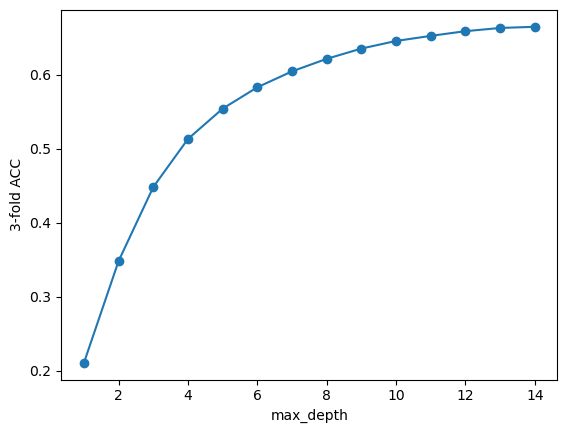

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=300, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold ACC')

plt.show()

In [48]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=300,max_features='sqrt').fit(XtrainScaled,y_train)

print("Train: ",randomForest.score(XtrainScaled,y_train))
print("Test: ",randomForest.score(XtestScaled,y_test))

Train:  0.8991924094686086
Test:  0.4517435260146565


In [52]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = randomForest.predict(XtrainScaled)
y_test_pred = randomForest.predict(XtestScaled)

# Calcular el error cuadrático medio (MSE) en el conjunto de entrenamiento y de prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular el RMSE (Root Mean Squared Error) en el conjunto de entrenamiento y de prueba
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('RMSE Modelo Random Forest (train): %0.3f' % rmse_train)
print('RMSE Modelo Random Forest (test) : %0.3f' % rmse_test)


RMSE Modelo Random Forest (train): 20.838
RMSE Modelo Random Forest (test) : 47.057


## Selección de características

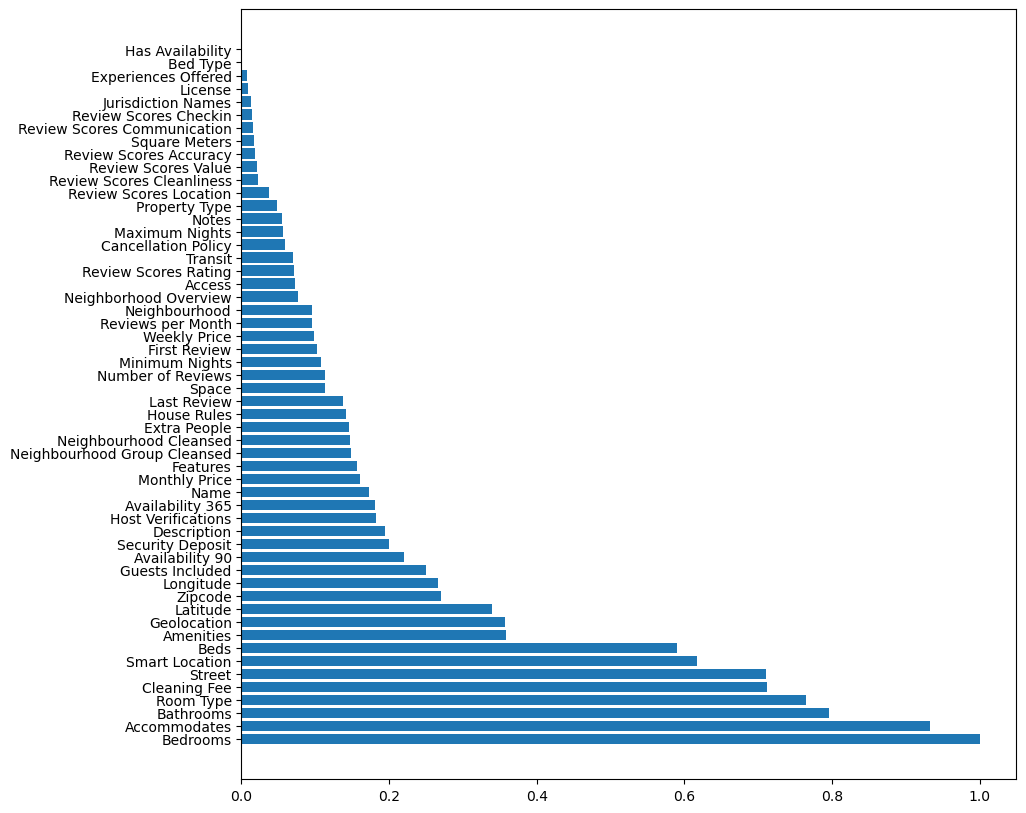

In [51]:
# Con la selección de características practicamente no me mejora nada el modelo pero aqui dejo el código y la gráfica

feature_names = df_airbnb.columns.drop(df_airbnb.columns[27])

importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Conclusión final

Durante el proyecto, realicé un análisis detallado de los datos y utilicé un modelo de Random Forest
para predecir los precios de las viviendas. Sin embargo, los resultados obtenidos muestran que el modelo
podría estar sobreajustado, ya que no generaliza bien a nuevos datos. He intentado mejorar el modelo a traves de la regularización o la selección de variables y la mejoria es prácticamente inapreciable. He realizado el análisis con el mayor cuidado posible y aún así no se que falla, no se si habrá algún error que he podido pasar desapecibido pero no he conseguido identificarlo.